# Part I - (Loan Data from Prosper Exploration)
## by IBRAHIM SALMAN

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#uni">Univariate Exploration</a></li>
<li><a href="#bi">Bivariate Exploration</a></li>
<li><a href="#multi">Multivariate Exploration</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower APR, borrower rate (or interest rate), current loan status, borrower income, and many others.

<a id='wrangling'></a>
## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Loading the dataset and getting the first 5 rows 
loan_df = pd.read_csv('prosperLoanData.csv')
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# Checking the dimensions of the dataset
loan_df.shape

(113937, 81)

In [4]:
# Getting a general overview of the dataset
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
# Getting some summary stats
loan_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
# Checking out the datatypes
loan_df.dtypes[:60]

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

In [7]:
loan_df.dtypes[60:]

LoanFirstDefaultedCycleNumber      float64
LoanMonthsSinceOrigination           int64
LoanNumber                           int64
LoanOriginalAmount                   int64
LoanOriginationDate                 object
LoanOriginationQuarter              object
MemberKey                           object
MonthlyLoanPayment                 float64
LP_CustomerPayments                float64
LP_CustomerPrincipalPayments       float64
LP_InterestandFees                 float64
LP_ServiceFees                     float64
LP_CollectionFees                  float64
LP_GrossPrincipalLoss              float64
LP_NetPrincipalLoss                float64
LP_NonPrincipalRecoverypayments    float64
PercentFunded                      float64
Recommendations                      int64
InvestmentFromFriendsCount           int64
InvestmentFromFriendsAmount        float64
Investors                            int64
dtype: object

In [8]:
# Checking out the number of unique values in each variable before selecting variables of interest
loan_df.nunique()[:60]

ListingKey                             113066
ListingNumber                          113066
ListingCreationDate                    113064
CreditGrade                                 8
Term                                        3
LoanStatus                                 12
ClosedDate                               2802
BorrowerAPR                              6677
BorrowerRate                             2294
LenderYield                              2283
EstimatedEffectiveYield                  1582
EstimatedLoss                             120
EstimatedReturn                          1476
ProsperRating (numeric)                     7
ProsperRating (Alpha)                       7
ProsperScore                               11
ListingCategory (numeric)                  21
BorrowerState                              51
Occupation                                 67
EmploymentStatus                            8
EmploymentStatusDuration                  605
IsBorrowerHomeowner               

In [9]:
loan_df.nunique()[60:]

LoanFirstDefaultedCycleNumber          43
LoanMonthsSinceOrigination             94
LoanNumber                         113066
LoanOriginalAmount                   2468
LoanOriginationDate                  1873
LoanOriginationQuarter                 33
MemberKey                           90831
MonthlyLoanPayment                  23567
LP_CustomerPayments                 78523
LP_CustomerPrincipalPayments        49828
LP_InterestandFees                  78751
LP_ServiceFees                      19813
LP_CollectionFees                    6175
LP_GrossPrincipalLoss               15848
LP_NetPrincipalLoss                 15709
LP_NonPrincipalRecoverypayments      2631
PercentFunded                         719
Recommendations                        17
InvestmentFromFriendsCount             14
InvestmentFromFriendsAmount           726
Investors                             751
dtype: int64

The next few cells are meant to check out the summary statistics and samples of some datasets to see if they will be interesting to explore

In [10]:
loan_df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [11]:
loan_df.EmploymentStatusDuration.value_counts()[:60]

0.0     1534
4.0     1186
1.0     1177
3.0     1174
2.0     1153
5.0     1151
7.0     1116
8.0     1103
6.0     1103
12.0    1076
9.0     1025
13.0    1020
10.0    1008
11.0     991
14.0     989
15.0     933
17.0     930
19.0     899
18.0     894
26.0     889
16.0     886
24.0     874
22.0     868
23.0     855
21.0     851
25.0     843
20.0     836
27.0     812
28.0     796
36.0     762
32.0     758
30.0     757
29.0     757
31.0     755
37.0     751
34.0     715
33.0     713
42.0     712
35.0     704
38.0     690
39.0     669
44.0     656
43.0     653
41.0     648
45.0     647
49.0     631
40.0     624
48.0     622
47.0     611
51.0     597
54.0     594
46.0     592
72.0     589
60.0     582
Name: EmploymentStatusDuration, dtype: int64

In [12]:
# loan_df.TotalCreditLinespast7years.value_counts()[:60]
# Why aren't you running?
# loan_df.TotalCreditLinespast7years.loc[((loan_df.TotalCreditLinespast7years.value_counts()) == 1)]
((loan_df.TotalCreditLinespast7years.value_counts()) == 1).sum()

13

In [13]:
loan_df.StatedMonthlyIncome.sample()

62104    4583.333333
Name: StatedMonthlyIncome, dtype: float64

In [14]:
loan_df.OnTimeProsperPayments.value_counts()

9.0      1575
6.0      1234
10.0     1146
11.0     1039
35.0      832
         ... 
132.0       1
134.0       1
133.0       1
123.0       1
118.0       1
Name: OnTimeProsperPayments, Length: 127, dtype: int64

In [15]:
loan_df.InvestmentFromFriendsCount.value_counts()

0     111806
1       1835
2        215
3         40
4         15
5          8
9          5
6          4
8          3
7          2
33         1
20         1
15         1
13         1
Name: InvestmentFromFriendsCount, dtype: int64

In [16]:
# loan_df.InvestmentFromFriendsAmount.sample(10)
loan_df.InvestmentFromFriendsAmount.value_counts()

0.00       111806
50.00         323
100.00        242
1000.00       100
500.00         97
            ...  
48.51           1
102.34          1
53.27           1
953.33          1
501.99          1
Name: InvestmentFromFriendsAmount, Length: 726, dtype: int64

In [17]:
loan_df.Investors.value_counts()

1      27814
2       1386
3        991
4        827
5        753
       ...  
881        1
801        1
752        1
715        1
831        1
Name: Investors, Length: 751, dtype: int64

In [18]:
loan_df.Investors.isna().sum()

0

In [19]:
loan_df.LoanOriginationQuarter.value_counts()

Q4 2013    14450
Q1 2014    12172
Q3 2013     9180
Q2 2013     7099
Q3 2012     5632
Q2 2012     5061
Q1 2012     4435
Q4 2012     4425
Q2 2008     4344
Q4 2011     3913
Q1 2013     3616
Q3 2008     3602
Q2 2007     3118
Q3 2011     3093
Q1 2007     3079
Q1 2008     3074
Q3 2007     2671
Q4 2007     2592
Q2 2011     2478
Q4 2006     2403
Q3 2006     1934
Q1 2011     1744
Q4 2010     1600
Q2 2010     1539
Q4 2009     1449
Q3 2010     1270
Q2 2006     1254
Q1 2010     1243
Q3 2009      585
Q4 2008      532
Q1 2006      315
Q4 2005       22
Q2 2009       13
Name: LoanOriginationQuarter, dtype: int64

In [20]:
loan_df.LoanOriginalAmount.value_counts() 

4000     14333
15000    12407
10000    11106
5000      6990
2000      6067
         ...  
14383        1
6251         1
14447        1
6379         1
4098         1
Name: LoanOriginalAmount, Length: 2468, dtype: int64

In [21]:
loan_df.DebtToIncomeRatio.sample(10)

19709     0.59
12611     0.12
10681     0.39
95512     0.11
98587     0.16
91972     0.13
150       0.06
12558     0.22
111679    0.13
3014      0.25
Name: DebtToIncomeRatio, dtype: float64

In [22]:
loan_df['TradesNeverDelinquent (percentage)'].value_counts()

1.00    41705
0.96     4245
0.95     3755
0.90     3171
0.94     3051
        ...  
0.19        5
0.06        3
0.49        1
0.03        1
0.99        1
Name: TradesNeverDelinquent (percentage), Length: 98, dtype: int64

In [23]:
loan_df['TradesNeverDelinquent (percentage)'].sample(10)

77768    1.00
8918     1.00
13739    1.00
58436     NaN
40436    1.00
2229     0.88
9503     0.43
75100    0.94
38510    0.91
75078    1.00
Name: TradesNeverDelinquent (percentage), dtype: float64

In [24]:
loan_df.AvailableBankcardCredit.sample(10)

5082       948.0
53918     4697.0
62715     6153.0
86550     2585.0
46943      147.0
85109      502.0
57096    47931.0
47598     5055.0
19624        0.0
53945        NaN
Name: AvailableBankcardCredit, dtype: float64

In [25]:
print(loan_df.CurrentDelinquencies.value_counts())
loan_df.CurrentDelinquencies.sample(10)

0.0     89742
1.0     11716
2.0      4357
3.0      2098
4.0      1379
5.0       916
6.0       690
7.0       517
8.0       397
9.0       289
10.0      212
11.0      191
12.0      147
13.0      111
15.0       83
14.0       71
16.0       58
17.0       40
18.0       37
21.0       31
19.0       28
20.0       27
22.0       21
27.0       12
24.0       12
23.0        9
26.0        8
31.0        6
25.0        5
28.0        5
32.0        5
30.0        2
36.0        2
35.0        2
41.0        2
40.0        1
39.0        1
82.0        1
64.0        1
33.0        1
50.0        1
57.0        1
83.0        1
51.0        1
45.0        1
59.0        1
37.0        1
Name: CurrentDelinquencies, dtype: int64


69530    0.0
44215    0.0
60363    0.0
66314    0.0
63376    0.0
66760    0.0
70899    1.0
54891    0.0
17325    0.0
67000    1.0
Name: CurrentDelinquencies, dtype: float64

In [26]:
print(loan_df.AmountDelinquent.value_counts())
loan_df.AmountDelinquent.sample(10)

0.0         89818
50.0           73
100.0          67
25.0           66
30.0           65
            ...  
52844.0         1
10776.0         1
19226.0         1
13986.0         1
327677.0        1
Name: AmountDelinquent, Length: 7059, dtype: int64


1768         NaN
2584         0.0
71838    39227.0
52041        0.0
30146        0.0
21405        0.0
64292        0.0
66234        0.0
10623        0.0
53144        0.0
Name: AmountDelinquent, dtype: float64

<a id='structure'></a>
### What is the structure of your dataset?

This data set contains 113,937 loans with 81 variables (Credit grade, loan term, loan status, borrower APR, borrower rate borrower state, occupation, and other loan, personal, financial, and demographic data) on each loan. The variables are strings, floats, and integer in nature, though some strings need to be changed to the categorical (ordinal) data type with the following levels.<br><br>
(worst/smallest) ----> (best/largest)<br>
CreditGrade: HR, E, D, C, B, A, AA<br>
Term: 12, 36, 60<br>
IncomeRange: Not displayed, Not employed, USD 0, USD 1-24,999, USD 25,000-49,999, USD 50,000-74,999, USD 75,000-99,999, USD 100,000+<br>

<a id ='features'></a>
### What is/are the main feature(s) of interest in your dataset?

I'm most interested in finding out the variables that affect the Borrower's APR. I'm also interested in the distributions of the likely variables that affect the Borrower's APR.

<a id='featuresupport'></a>
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I feel the following variables will help support my investigation into my feature of interest:
1. CreditGrade
2. Term
3. LoanStatus
4. BorrowerRate
5. ProsperRating
6. BorrowerState
7. ListingCategory
8. Occupation
9. EmploymentStatus
10. IsBorrowerHomeowner
11. IncomeRange
12. StatedMonthlyIncome
13. ProsperPrincipalBorrowed
14. LoanOriginalAmount
15. DebtToIncomeRatio

<a id="uni"></a>
## Univariate Exploration

In this section, I'll investigate distributions of individual variables. If I see unusual points or outliers, I'll take a deeper look to clean things up and prepare the myself to look at relationships between variables.

Before I start the univariate visualizations, I'll create some functions to reduce repition of code

In [27]:
# Function to generate bar chart
def create_bar_chart(orientation = 'x', variable=None, variable_name=None, order=None, descending=False, rotate_labels=False):
    """Function to create a bar chart by simply inputing the variable, variable_name, and order"""
    base_color = sb.color_palette()[0]
    
    # so that the function can access the dataframe
    global loan_df
    
    # Ordering 
    if descending == True:
        loan_df = loan_df.sort_values(variable, ascending=False)
    
    # Orientation for x
    if orientation == 'x':
        sb.countplot(data=loan_df, x=variable, color=base_color, order=order)
        plt.xlabel(variable_name)
        plt.ylabel('Count')
        # get the current tick locations and labels
        locs, labels = plt.xticks() 

        # loop through each pair of locations and labels
        for loc, label in zip(locs, labels):

            # get the text property for the label to get the correct count
            person_counts = loan_df[variable].value_counts()
            count = person_counts[label.get_text()]
            n_persons = loan_df[variable].value_counts().sum()
            pct_string = '{:0.1f}%'.format(100*count/n_persons)

            # print the annotation just below the top of the bar
            plt.text(loc, count+100, pct_string, ha = 'center', color = 'black')
    
    # Orientation for y
    if orientation == 'y':
        sb.countplot(data=loan_df, y=variable, color=base_color, order=order)
        plt.ylabel(variable_name)
        plt.xlabel('Count')
        
        variable_counts = loan_df[variable].value_counts()
        
        for i in range (variable_counts.shape[0]):
            count = variable_counts[i]
            # Convert count into a percentage, and then into string
            n_persons = loan_df[variable].value_counts().sum()
            pct_string = '{:0.1f}%'.format(100*count/n_persons)
            # Print the string value on the bar. 
            plt.text(count+100, i, pct_string, va='center', color='black')

    # To rotate the labels when required
    if rotate_labels == True:
        plt.xticks(rotation=90)
        
    # To generate an automatic title when required
    plt.title(f'Bar Chart of {variable_name} Distribution')

In [28]:
# Function to generate histogram
def create_hist(variable, variable_name, bin_size):
    """To generate histogram charts faster"""
    # create bins
    bins = np.arange(loan_df[variable].min(), loan_df[variable].max()+bin_size, bin_size)
    # plotting hist with dataframe and adding labels and titles
    plt.hist(data = loan_df, x = variable, bins = bins);
    plt.xlabel(variable_name)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {variable_name} Distribution')

In [29]:
# Function to convert datatype to categorical
def to_categorical(variable, ordered_list):
    """Changes a variable to the categorical datatype by taking the variable name and ordered list as inputs"""
    ordered_list = ordered_list
    to_category = pd.api.types.CategoricalDtype(ordered = True, categories = ordered_list)
    loan_df[variable] = loan_df[variable].astype(to_category)

In [30]:
# Function to get the asending or descending order of a column
def get_order(variable, descending=True):
    """Can get the ascending or descending order of a column based on the value counts"""
    order = loan_df[variable].value_counts().index
    if descending == True:
        return order
    elif descending == False:
        return order[::-1]

First, we'll take a look at how the `BorrowerAPR` feature is distributed.

<a id="qu4"></a>
### Question 1

How are the `BorrowerAPR` distributed?

### Visualization 1

For this variable, I'll be using the histogram chart to depict the distribution

In [31]:
# Checking out the summary statistics to choose a bin
loan_df.BorrowerAPR.describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

In [32]:
# Also, checking samples
loan_df.BorrowerAPR.sample(10)

108299    0.17090
86748     0.19178
100578    0.35643
35937     0.26762
101842    0.35797
43271     0.20716
31500     0.34621
15969     0.16461
43138     0.24754
107847    0.29107
Name: BorrowerAPR, dtype: float64

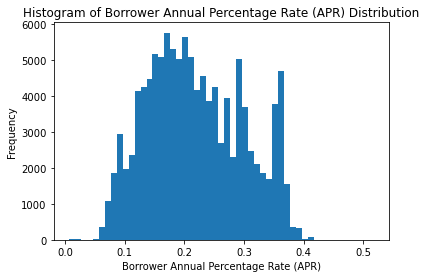

In [33]:
# Creating the histogram for the BorrowerAPR data
create_hist(variable='BorrowerAPR', variable_name='Borrower Annual Percentage Rate (APR)', bin_size=0.01)

### Observation 1

The distribution increases steadily from 0.006530 (min) then peaks at the 0.15 - 0.225 range with other smaller peaks towards the right.

Next, let's take a look at how the `CreditGrade` feature is distributed.

<a id="qu1"></a>
### Question 2
How many persons are in each CreditGrade level?

### Visualization 2.1

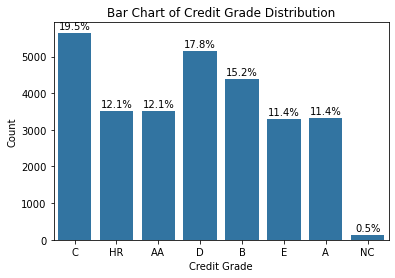

In [34]:
create_bar_chart(variable='CreditGrade', variable_name='Credit Grade')

### Observation 2.1

After re-inspection of the dataset in Excel, it seems as though the remaining data for the `CreditGrade` is in the `ProsperRating (Alpha)` column. I'll have to merge both columns.

Now, I'll be using the `combine_first` pandas' function to combine the two columns to get a new `CreditGrade` column.

In [35]:
# Combining the CreditGrade and ProsperRating columns into the CreditGrade column 
loan_df['CreditGrade'] = loan_df['CreditGrade'].combine_first(loan_df['ProsperRating (Alpha)'])

### Visualization 2.2

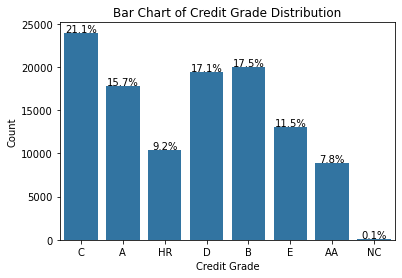

In [36]:
# The new visualization with the complete data
create_bar_chart(variable='CreditGrade', variable_name='Credit Grade')

### Observation 2.2

It seems `NC` has a very low count. I'll have to check out the count first.

In [37]:
(loan_df.CreditGrade == 'NC').sum()

141

I'll be dropping rows with the `NC`credit grade as it not an actual credit grade. Here's <a href='https://www.prosper.com/invest/how-to-invest/prosper-ratings/?mod=article_inline'>a list of actual credit</a> the Prosper Loan company offers.

In [38]:
loan_df = loan_df[loan_df.CreditGrade != 'NC']

### Visualization 2.3

Now, plotting the cleaned `CreditGrade` data and adding the order argument since it is an ordinal data.

In the next cell, I'll be changing the `CreditGrade` datatype to the category datatype.

In [39]:
to_categorical(variable='CreditGrade', ordered_list=['AA', 'A', 'B', 'C', 'D', 'E', 'HR'])

In [40]:
loan_df.CreditGrade.dtypes

CategoricalDtype(categories=['AA', 'A', 'B', 'C', 'D', 'E', 'HR'], ordered=True)

Successfully changed the datatype, now to create the visualization

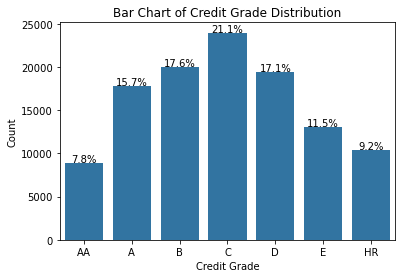

In [41]:
# The new visualization with the cleaned data
create_bar_chart(variable='CreditGrade', variable_name='Credit Grade')

### Observation 2.3 (Final Observation)

Here are the observations that can be made from this visualization:
1. With the complete data, it can be seen that most persons (21.1%) are in the average credit grade (`C`). 
2. It can also be seen that the distribution increases steadily from the `AA` grade and peaks at the `C` grade then a steady decline from the `C` grade to the lowest level `HR`.

Now, let's check out how the `Term` column is distributed.

<a id="qu2"></a>
### Question 3
How many persons are in each of the three term bar?

But before that, we'll need to change the datatype to the categorical (ordinal) datatype

In [42]:
# Changing the datatype to str
loan_df.Term = loan_df.Term.astype('str')
# Converting to a categorical datatype
to_categorical(variable='Term', ordered_list=['12', '36', '60'])

Now, to check if the operation was successful

In [43]:
# Checking if the wrangling operating was successful
loan_df.Term.dtypes

CategoricalDtype(categories=['12', '36', '60'], ordered=True)

### Visualization 3

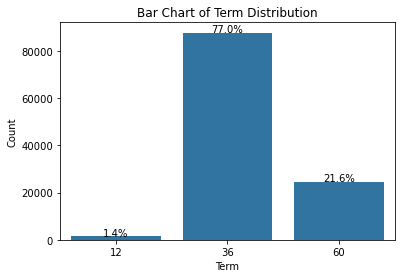

In [44]:
create_bar_chart(variable='Term', variable_name='Term')

### Observation 3

From the visualization above, I notice a very little number of persons are on the 12-month term loans. Let's get a closer look at that.

In [45]:
loan_df.Term.value_counts()

36    87637
60    24545
12     1614
Name: Term, dtype: int64

In [46]:
loan_df[loan_df['Term'] == '12']

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
67,0F2535122339224397B0FB9,499401,2011-03-25 17:20:01.857000000,E,12,Completed,2012-03-26 00:00:00,0.35843,0.2669,0.2569,...,-14.79,0.0,0.00,0.00,0.0,1.0,0,0,0.0,32
245,300135506070437702CDEB9,604168,2012-06-26 05:56:01.930000000,A,12,Completed,2013-07-06 00:00:00,0.11893,0.0817,0.0717,...,-55.07,0.0,0.00,0.00,0.0,1.0,0,0,0.0,21
353,094D3534821837880D65EB9,545788,2011-12-20 14:15:59.263000000,D,12,Completed,2012-12-22 00:00:00,0.28918,0.1900,0.1800,...,-11.19,0.0,0.00,0.00,0.0,1.0,0,0,0.0,9
360,08F53518598636417B0B12D,513939,2011-06-30 07:10:55.167000000,D,12,Completed,2011-09-27 00:00:00,0.34105,0.2499,0.2399,...,-6.38,0.0,0.00,0.00,0.0,1.0,0,0,0.0,49
385,09143546084063023AE7720,583970,2012-04-29 17:23:05.540000000,E,12,Completed,2013-05-11 00:00:00,0.31368,0.2343,0.2243,...,-22.54,0.0,0.00,0.00,0.0,1.0,0,0,0.0,84
408,09B235528699752739AD9A8,610296,2012-07-11 12:09:43.963000000,B,12,Completed,2013-07-18 00:00:00,0.17969,0.1224,0.1124,...,-38.50,0.0,0.00,0.00,0.0,1.0,0,0,0.0,12
492,450935699054612586A8915,712870,2013-02-12 11:17:38.850000000,B,12,Completed,2013-08-20 00:00:00,0.17493,0.1177,0.1077,...,-7.25,0.0,0.00,0.00,0.0,1.0,0,0,0.0,72
531,3BC835563056969451C3CF8,629978,2012-08-28 05:06:28.960000000,B,12,Completed,2012-12-31 00:00:00,0.18526,0.1279,0.1179,...,-3.94,0.0,0.00,0.00,0.0,1.0,0,0,0.0,21
584,45A63539447744998BB769C,563386,2012-02-27 15:38:51.863000000,C,12,Completed,2012-11-23 00:00:00,0.24148,0.1434,0.1334,...,-16.12,0.0,0.00,0.00,0.0,1.0,0,0,0.0,95
727,3D113547601415146E935A6,589139,2012-05-14 16:21:31.590000000,C,12,Completed,2013-03-25 00:00:00,0.20784,0.1304,0.1204,...,-10.17,0.0,0.00,0.00,0.0,1.0,0,0,0.0,28


Seems everything's okay. Most persons just prefer getting a loan for a longer period like 36 months. If there are other trends, we'll find out in the bivariate and multivariate visualization sections.

Now, let's check out how the `LoanStatus` feature is distributed.

<a id="qu3"></a>
### Question 4
How many persons are in each loan status?

### Visualization 4

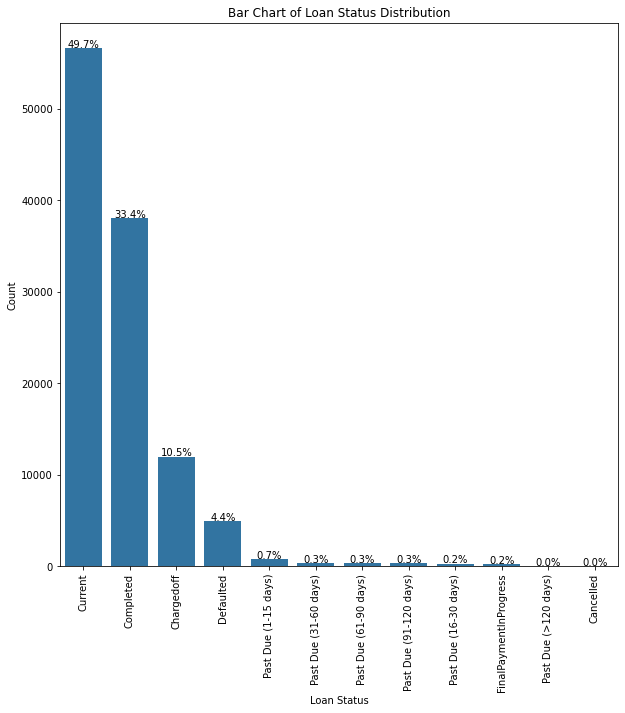

In [47]:
plt.figure(figsize=(10, 10))
order = get_order('LoanStatus')
create_bar_chart(variable='LoanStatus', variable_name='Loan Status', order=order, rotate_labels=True)

### Observation 4

I observed the following things:
1. It seems the `Cancelled` and `Past Due (>120 days)` Loan statuses have little to no value counts.
2. The `Current` and `Completed` Loan statuses have the highest value counts.

In [48]:
loan_df.LoanStatus.value_counts()

Current                   56576
Completed                 38032
Chargedoff                11957
Defaulted                  4954
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

From the above statistics, it can be deduced that the `Cancelled` and `Past Due (>120 days)` indeed have a very little value count.

Now, let's check out how the `BorrowerRate` data is distributed

<a id="qu5"></a>
### Question 5

How is the `BorrowerRate` distributed?

### Visualization 5

First, I'll go through some summary stats and samples to pick an appropriate bin size

In [49]:
# Checking out the summary statistics to select the bin size
loan_df.BorrowerRate.describe()

count    113796.000000
mean          0.192727
std           0.074829
min           0.000000
25%           0.133900
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

In [50]:
# Checking out some samples
loan_df.BorrowerRate.sample(10)

62349     0.1485
934       0.1490
40597     0.1950
51965     0.2624
88587     0.0849
35942     0.2600
13126     0.2049
38086     0.2272
11542     0.0920
111313    0.1715
Name: BorrowerRate, dtype: float64

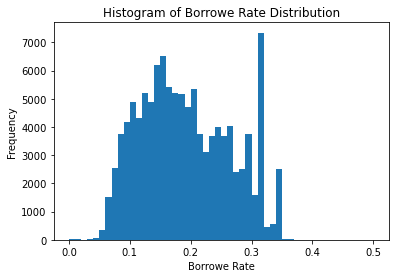

In [51]:
# Creating histogram for the BorrowerRate variable
create_hist(variable='BorrowerRate', variable_name='Borrowe Rate', bin_size=0.01)

### Observation 5

From the histogram, I can observe that the frequency of the distribution steadily increases from 0 (min) then starts declining after two peaks at around the 0.15 range then starts declining but it experiences another massive peak at the 0.31 area.

Next question is which states most Prosper loan clients are from.

<a id='qu6'></a>
### Question 6

Which states are most of Prosper loan's clients from?

### Visualization 6

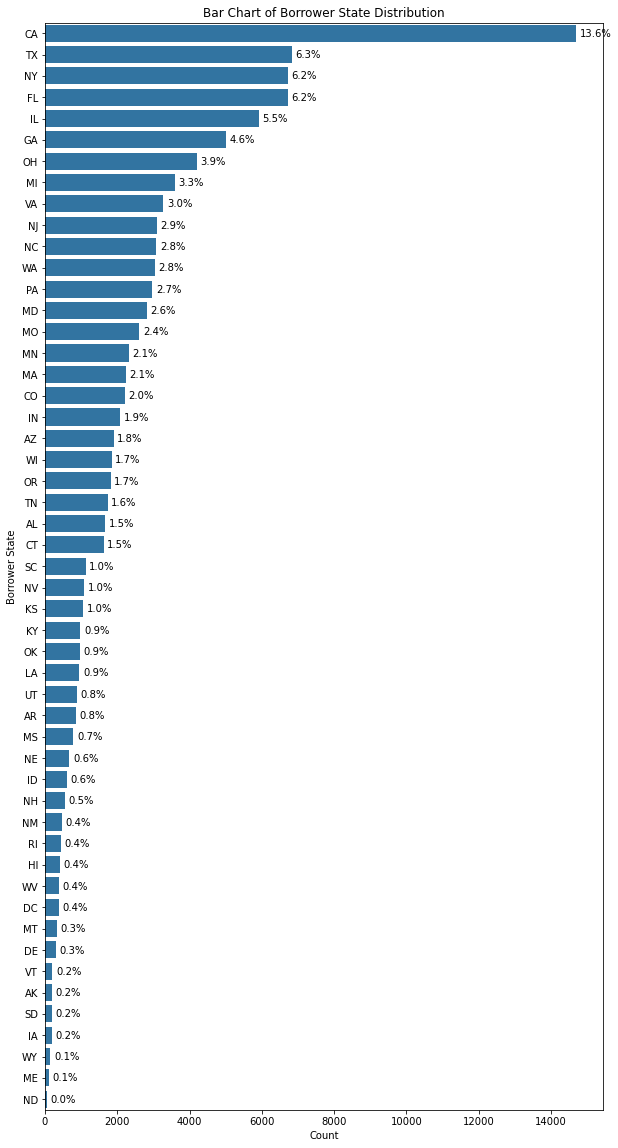

In [52]:
# creating a bar chart for the BorrowerState variable
order = get_order('BorrowerState')
plt.figure(figsize=(10, 20))
create_bar_chart(orientation='y', variable='BorrowerState', variable_name='Borrower State', order=order)

### Observation 6

This chart shows that most borrowers are from california.

Now, let's check out the occupational distribution of the borrowers.

<a id='qu7'></a>
### Question 7

What kind of work do most of the borrowers do?

### Visualization 7

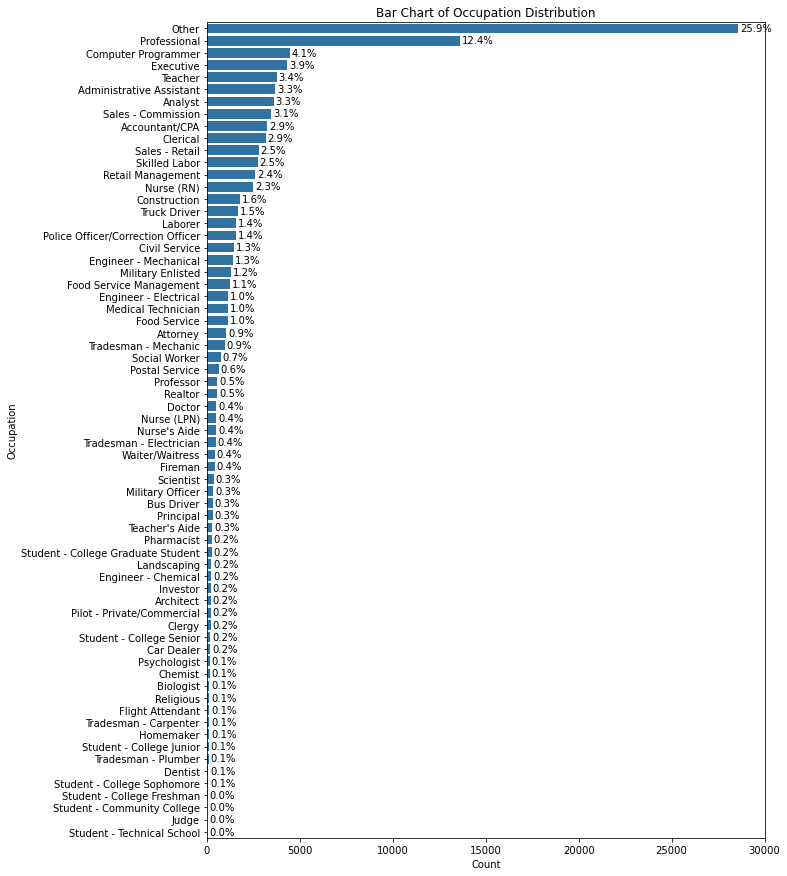

In [53]:
# Creating a bar chart for the Occupation variable
order = get_order('Occupation')
plt.figure(figsize=(10, 15))
create_bar_chart(orientation='y', variable='Occupation', variable_name='Occupation', order=order)

### Observation 7

From this, it can be observed that most people classified their occupations as "<strong>Others</strong>". <br>
It can also be observed that professional was the second most chosen occupation.

Next, let's take a look at the employment status distribution of the borrowers.

<a id='qu8'></a>
### Question 8

What is the distribution of the employment status of the company's clients?

### Visualization 8.1

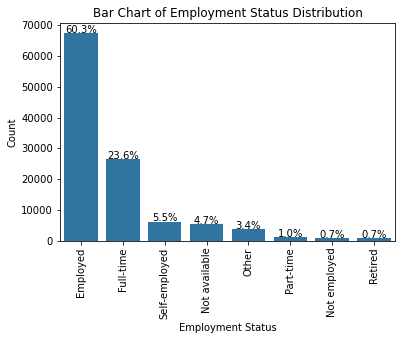

In [54]:
# Creating visualization for the EmploymentStatus column
order = get_order('EmploymentStatus')
create_bar_chart(variable='EmploymentStatus', variable_name='Employment Status', order=order, rotate_labels=True)

In [55]:
loan_df.EmploymentStatus.isna().sum()

2213

### Observation 8.1

It seems the data requires a little wrangling. Why? Part-Time and Full-Time should also be classified as Employed since I don't have the data to seperate the Employed data into Part-Time and Full-Time, I'll be changing them to Employed.

Also, the na values can also be changed to "Not available" since we already have a placeholder for that.

In [56]:
# replace the nan values with "Not available"
loan_df.EmploymentStatus.fillna('Not available', inplace=True)

In [57]:
# Testing the above code
loan_df.EmploymentStatus.isna().sum()

0

Great. One issue down. One more to go.

In [58]:
# Replacing the "Full-time" and "Part-time" with "Employed"
loan_df['EmploymentStatus'] = loan_df['EmploymentStatus'].str.replace('Full-time', 'Employed')
loan_df['EmploymentStatus'] = loan_df['EmploymentStatus'].str.replace('Part-time', 'Employed')

In [59]:
# Testing the outcome of the above code
loan_df.EmploymentStatus.value_counts()

Employed         94765
Not available     7461
Self-employed     6134
Other             3806
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

### Visualization 8.2

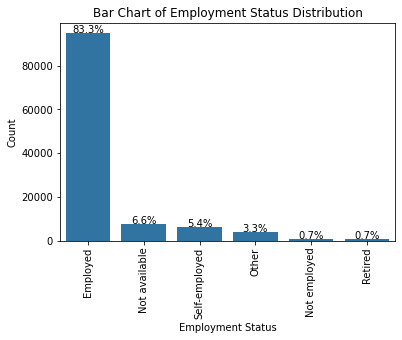

In [60]:
# Revisualizing the EmploymentStatus column
order = get_order('EmploymentStatus')
create_bar_chart(variable='EmploymentStatus', variable_name='Employment Status', order=order, rotate_labels=True)

### Observation 8.2 (Final Observation)

From the chart above, we can conclude that most people (83.3%) that take out loans from Prosper loan are employed.

Now, we can take a look at the income range distribution of the borrowers.

<a id='qu9'></a>
### Question 9

Which income range is the most common?

In [61]:
# First, we need to convert the data to the categorical (ordinal) datatype
to_categorical(variable='IncomeRange', ordered_list=['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'])

In [62]:
loan_df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7600
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

### Visualization 9.1

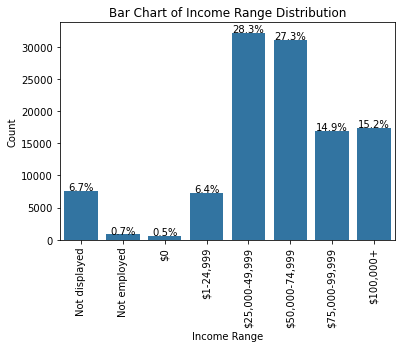

In [63]:
# Bar chart for income range
create_bar_chart(variable='IncomeRange', variable_name='Income Range', rotate_labels=True)

### Observation 9.1

From the above visualization, it can be concluded that the most common income range are the  <strong>USD25,000-49,999</strong> and <strong>USD50,000-74,999</strong> income ranges.

I feel this data can be cleaned a little further by doing the classification myself.

In [64]:
# Checking out how the employment statuses of the income range less than 1
(loan_df.EmploymentStatus[loan_df['StatedMonthlyIncome'] < 1]).value_counts()

Not employed     762
Employed         424
Self-employed    332
Not available    111
Retired           12
Other              1
Name: EmploymentStatus, dtype: int64

In [65]:
# Checking the amount of persons that haven't verified their income
loan_df.IncomeVerifiable.value_counts()

True     105132
False      8664
Name: IncomeVerifiable, dtype: int64

In [66]:
# Seems most of the persons that haven't verified their income are self-employed
loan_df[loan_df['IncomeVerifiable'] == False]['EmploymentStatus'].value_counts(normalize=1)

Self-employed    0.593029
Employed         0.271237
Not employed     0.083218
Other            0.032318
Not available    0.012696
Retired          0.007502
Name: EmploymentStatus, dtype: float64

In [67]:
# Now, to get the income range from the statedmonthlysalary

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# Creating a new column for the estimated yearly income
loan_df['YearlyIncomeEstimate'] = loan_df['StatedMonthlyIncome'] * 12

# Creating smaller dataframes that meets each range condition
first_range = loan_df.loc[(loan_df['YearlyIncomeEstimate'] < 1)]
second_range = loan_df.loc[(loan_df['YearlyIncomeEstimate'] >= 1) & (loan_df['YearlyIncomeEstimate'] < 25000)]
third_range = loan_df.loc[(loan_df['YearlyIncomeEstimate'] >= 25000) & (loan_df['YearlyIncomeEstimate'] < 50000)]
fourth_range = loan_df.loc[(loan_df['YearlyIncomeEstimate'] >= 50000) & (loan_df['YearlyIncomeEstimate'] < 75000)]
fifth_range = loan_df.loc[(loan_df['YearlyIncomeEstimate'] >= 75000) & (loan_df['YearlyIncomeEstimate'] < 100000)]
last_range = loan_df.loc[(loan_df['YearlyIncomeEstimate'] >= 100000)]

# Creating a list of all range conditions
range_list = [first_range, second_range, third_range, fourth_range, fifth_range, last_range]

# creating an empty column
loan_df['IncomeRangeAdj'] = ""

# iterating over all the range conditions and setting the appropriate income range
for i in range_list[0].index:
    loan_df['IncomeRangeAdj'][i] = '$0'
for i in range_list[1].index:
    loan_df['IncomeRangeAdj'][i] = '$1-24,999'
for i in range_list[2].index:
    loan_df['IncomeRangeAdj'][i] = '$25,000-49,999'
for i in range_list[3].index:
    loan_df['IncomeRangeAdj'][i] = '$50,000-74,999'
for i in range_list[4].index:
    loan_df['IncomeRangeAdj'][i] = '$75,000-99,999'
for i in range_list[5].index:
    loan_df['IncomeRangeAdj'][i] = '$100,000+'

In [68]:
loan_df.IncomeRangeAdj.value_counts()

$25,000-49,999    33871
$50,000-74,999    32733
$75,000-99,999    19451
$100,000+         16507
$1-24,999          9594
$0                 1640
Name: IncomeRangeAdj, dtype: int64

Great, I've been able to get a more complete column

I'll be comparing 10 random samples 10 times to be sure, it actually got the range

In [69]:
loan_df[['IncomeVerifiable', 'YearlyIncomeEstimate', 'IncomeRange', 'IncomeRangeAdj']].sample(10)

,IncomeVerifiable,YearlyIncomeEstimate,IncomeRange,IncomeRangeAdj
90589,False,0.000000,Not employed,$0
47156,True,50000.000004,"$50,000-74,999","$50,000-74,999"
68351,True,90240.000000,"$75,000-99,999","$75,000-99,999"
18020,True,40599.999996,"$25,000-49,999","$25,000-49,999"
102207,True,51999.999996,"$50,000-74,999","$50,000-74,999"
47743,True,170000.000004,"$100,000+","$100,000+"
17982,True,30000.000000,"$25,000-49,999","$25,000-49,999"
111604,True,50000.000004,"$50,000-74,999","$50,000-74,999"
82161,True,58800.000000,"$50,000-74,999","$50,000-74,999"
2782,True,38000.000004,"$25,000-49,999","$25,000-49,999"


It seems everything checks out. Great

Now, the new visualization

### Visualization 9.2

In [70]:
# First, we need to convert the data to the categorical (ordinal) datatype
to_categorical(variable='IncomeRangeAdj', ordered_list=['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'])

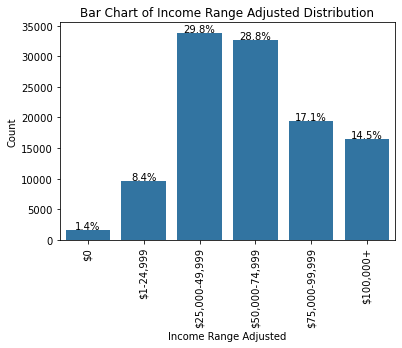

In [71]:
# Bar chart for income range Adj
create_bar_chart(variable='IncomeRangeAdj', variable_name='Income Range Adjusted', rotate_labels=True)

### Observation 9.2

Great. Everything looks okay now.

This visual shows that most of the borrowers are in the USD25,000-49,999 and USD50,000-74,999 income range.

Let's check out another currency distribution, though this is a more numeric kind of data as opposed to the categorical (ordinal) type we just explored.

<a id='qu10'></a>
### Question 10

How is the `StatedMonthlyIncome` distributed?

### Visualization 10

In [72]:
# Checking out the summary statistics
loan_df.StatedMonthlyIncome.describe()

count    1.137960e+05
mean     5.611955e+03
std      7.481520e+03
min      0.000000e+00
25%      3.208333e+03
50%      4.666667e+03
75%      6.833333e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [73]:
# It seems there are outliers, let's check them out
loan_df[loan_df['StatedMonthlyIncome'] > 1e+04]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,YearlyIncomeEstimate,IncomeRangeAdj
14,0F353575943675863D1AFC0,757359,2013-04-19 11:17:41.700000000,A,60,Current,NaN,0.11695,0.0949,0.0849,...,0.00,0.00,0.0,0.7731,0,0,0.0,371,129999.999996,"$100,000+"
29,0F563597161095613517437,1051243,2013-12-17 09:18:33.220000000,A,36,Current,NaN,0.15223,0.1239,0.1139,...,0.00,0.00,0.0,1.0000,0,0,0.0,1,125000.000004,"$100,000+"
33,0F6B3496936961316AEE1B2,478891,2010-10-10 13:23:30.757000000,AA,36,Completed,2012-12-21 00:00:00,0.08191,0.0785,0.0685,...,0.00,0.00,0.0,1.0000,0,0,0.0,326,156999.999996,"$100,000+"
40,10A43601079743929992413,1167746,2014-01-27 12:02:57.523000000,C,60,Current,NaN,0.19630,0.1725,0.1625,...,0.00,0.00,0.0,1.0000,0,0,0.0,3,153000.000000,"$100,000+"
45,0F843574249889932A8662E,741867,2013-04-01 05:20:57.110000000,A,60,Current,NaN,0.13227,0.1099,0.0999,...,0.00,0.00,0.0,1.0000,0,0,0.0,515,192000.000000,"$100,000+"
48,0F923587782964897A58B1B,875992,2013-08-20 19:25:08.830000000,B,60,Current,NaN,0.17522,0.1519,0.1419,...,0.00,0.00,0.0,1.0000,0,0,0.0,1,174999.999996,"$100,000+"
92,0FE433661215082408720F0,22591,2006-07-02 11:05:02.857000000,AA,36,Completed,2007-03-01 00:00:00,0.08292,0.0755,0.0705,...,0.00,0.00,0.0,1.0000,0,0,0.0,21,129999.999996,"$100,000+"
95,0FFC3601335963354A35791,1166429,2014-01-26 22:21:42.310000000,A,36,Current,NaN,0.12691,0.0990,0.0890,...,0.00,0.00,0.0,1.0000,0,0,0.0,1,177999.999996,"$100,000+"
102,0F823461624751165710F76,421994,2009-08-25 13:37:08.130000000,A,36,Completed,2012-09-15 00:00:00,0.15529,0.1338,0.1238,...,0.00,0.00,0.0,1.0000,0,0,0.0,293,180000.000000,"$100,000+"
196,10B03560492883055C87101,656502,2012-10-18 14:53:24.960000000,A,60,Current,NaN,0.15752,0.1346,0.1246,...,0.00,0.00,0.0,1.0000,0,0,0.0,34,399999.999996,"$100,000+"


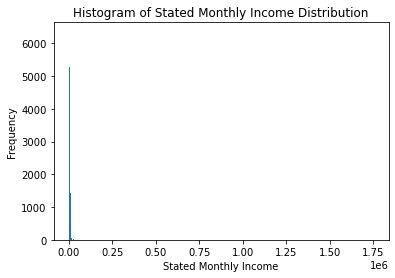

In [74]:
# Creating histogram for the BorrowerRate variable
create_hist(variable='StatedMonthlyIncome', variable_name='Stated Monthly Income', bin_size=250)

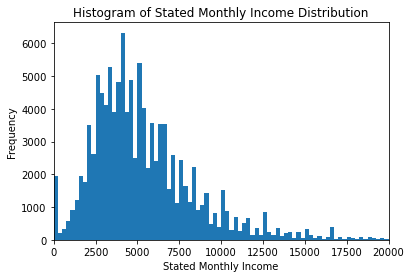

In [75]:
# Creating histogram for the BorrowerRate variable
create_hist(variable='StatedMonthlyIncome', variable_name='Stated Monthly Income', bin_size=250)
plt.xlim(0, 20000);

### Observation 10

From the visualization, it can be seen that the data has some outliers and most of the stated monthly income is from the range of 0 and 2000. 

Next, I'll be exploring the `DebtToIncomeRatio` distribution.

<a id='qu11'></a>
### Question 11

What is the distribution of the `DebtToIncomeRatio`?

### Visualization 11

In [76]:
# Checking out the summary stats
loan_df.DebtToIncomeRatio.describe()

count    105303.000000
mean          0.276090
std           0.551901
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

In [77]:
loan_df[loan_df['DebtToIncomeRatio']>1]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,YearlyIncomeEstimate,IncomeRangeAdj
22,101735700321773921526BF,706927,2013-01-30 09:36:13.783000000,HR,36,Current,NaN,0.35356,0.3134,0.3034,...,0.00,0.00,0.00,1.0,0,0,0.0,94,1419.999996,"$1-24,999"
226,2EA63382419173023274969,104542,2007-02-28 10:45:44.153000000,D,36,Completed,2009-07-07 00:00:00,0.11749,0.1000,0.0900,...,0.00,0.00,0.00,1.0,0,0,0.0,16,0.999996,$0
368,00F033886616529869C3281,128819,2007-04-25 19:19:24.050000000,C,36,Completed,2007-06-19 00:00:00,0.20735,0.2000,0.1850,...,0.00,0.00,0.00,1.0,0,0,0.0,74,12999.999996,"$1-24,999"
419,2C71357856570789463BB05,781432,2013-05-16 19:43:43.153000000,HR,36,Defaulted,2014-02-21 00:00:00,0.35356,0.3134,0.3034,...,3507.26,3507.26,0.00,1.0,0,0,0.0,50,12732.000000,"$1-24,999"
576,3C18338635952151669AA4C,124494,2007-04-16 17:44:06.780000000,AA,36,Completed,2007-06-28 00:00:00,0.10505,0.0935,0.0885,...,0.00,0.00,0.00,1.0,0,0,0.0,58,0.999996,$0
626,45C73538911628429AAB1CD,560943,2012-02-20 16:08:45.633000000,HR,36,Current,NaN,0.35797,0.3177,0.3077,...,0.00,0.00,0.00,1.0,0,0,0.0,5,45.999996,"$1-24,999"
627,45C8355717032471171C0DA,631267,2012-08-29 11:45:28.977000000,E,36,Completed,2012-09-07 00:00:00,0.33051,0.2909,0.2809,...,0.00,0.00,0.00,1.0,0,0,0.0,6,20000.000004,"$1-24,999"
1242,029C3391969521662B80577,146341,2007-06-03 20:32:32.783000000,A,36,Completed,2010-05-25 00:00:00,0.11415,0.1072,0.0997,...,0.00,0.00,0.00,1.0,0,0,0.0,87,0.999996,$0
1326,5C5E3538976213295AB035A,558815,2012-02-14 10:58:30.213000000,HR,36,Chargedoff,2014-01-16 00:00:00,0.35797,0.3177,0.3077,...,2458.80,2458.80,0.00,1.0,0,0,0.0,1,33000.000000,"$25,000-49,999"
1356,02803415966900900B282E0,294870,2008-03-17 19:28:44.040000000,HR,36,Completed,2011-03-21 00:00:00,0.14982,0.1284,0.1184,...,0.00,0.00,0.00,1.0,0,0,0.0,15,579.999996,"$1-24,999"


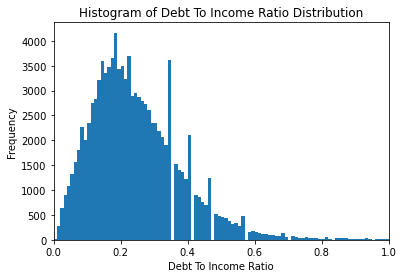

In [78]:
create_hist(variable='DebtToIncomeRatio', variable_name='Debt To Income Ratio', bin_size=0.01)
plt.xlim(0, 1);

In [79]:
loan_df.DebtToIncomeRatio.isna().sum()

8493

### Observation 11

The visualization above shows that the data has some outliers and most of the data are within the 0 and 1 range. <br>
The distribution progresses steadily from the right then gets its max peak at around 0.2 then declines steadily with smaller spikes and data gaps.

Being a homeowner might also be a criteria to easily access loan, let's check out how many of the Prosper borrowers are homeowners.

<a id='qu12'></a>
### Question 12

How many percentage of borrowers are homeowners?

### Visualization 12

True     0.505088
False    0.494912
Name: IsBorrowerHomeowner, dtype: float64


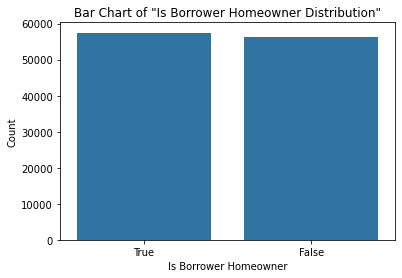

In [80]:
# Since the true and false values are very close, this will help show the distinction
print(loan_df.IsBorrowerHomeowner.value_counts(normalize=1))
# Getting the descending order
order = loan_df.IsBorrowerHomeowner.value_counts().index
# Creating the bar chart
base_color=sb.color_palette()[0]
sb.countplot(data=loan_df, x='IsBorrowerHomeowner', color=base_color, order=order)
plt.xlabel('Is Borrower Homeowner')
plt.ylabel('Count')
plt.title(f'Bar Chart of "Is Borrower Homeowner Distribution"');

### Observation 12

The visualization above shows that about half of the borrowers are homeowners and the other half are not. This data is about evenly distributed

Many persons have different reasons for taking out loans, let's check out the distribution that answers the question "Why a borrower took out a loan".

<a id='qu13'></a>
### Question 13

Which Listing category has the highest borrowers?

First I'll be change the column name to ListingCategory to make its handling easier.

In [81]:
loan_df.rename(columns = {'ListingCategory (numeric)':'ListingCategory'}, inplace = True)

Then, I'll convert the integers to strings and since it doesn't have a particular order, we don't need to convert to category

In [82]:
loan_df['ListingCategory'] = loan_df['ListingCategory'].astype('str')

Also, the labels should be descriptive so I'll be replacing the labels.

In [83]:
# Former labels; so that it can be compared to the results of the wrangling
loan_df.ListingCategory.value_counts()

1     58308
0     16824
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory, dtype: int64

The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [84]:
# Creating a dictionary for the replacement
my_dict = {'20':'Wedding Loans', '19':'Vacation', '18':'Taxes', '17':'RV', '16':'Motorcycle', '15':'Medical/Dental', '14':'Large Purchases', '13':'Household Expenses', '12':'Green Loans', '11':'Engagement Ring', '10':'Cosmetic Procedure', '9':'Boat', '8':'Baby&Adoption', '7':'Other', '6':'Auto', '5':'Student Use', '4':'Personal Loan', '3':'Business', '2':'Home Improvement', '1':'Debt Consolidation', '0':'Not Available'}
for i, j in my_dict.items():
    loan_df['ListingCategory'] = loan_df['ListingCategory'].str.replace(i, j)
loan_df['ListingCategory'].head(10)

0         Not Available
1      Home Improvement
2         Not Available
3            Motorcycle
4      Home Improvement
5    Debt Consolidation
6    Debt Consolidation
7      Home Improvement
8                 Other
9                 Other
Name: ListingCategory, dtype: object

In [85]:
loan_df.ListingCategory.value_counts()

Debt Consolidation    58308
Not Available         16824
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory, dtype: int64

Great. Everything checks out

### Visualization 13

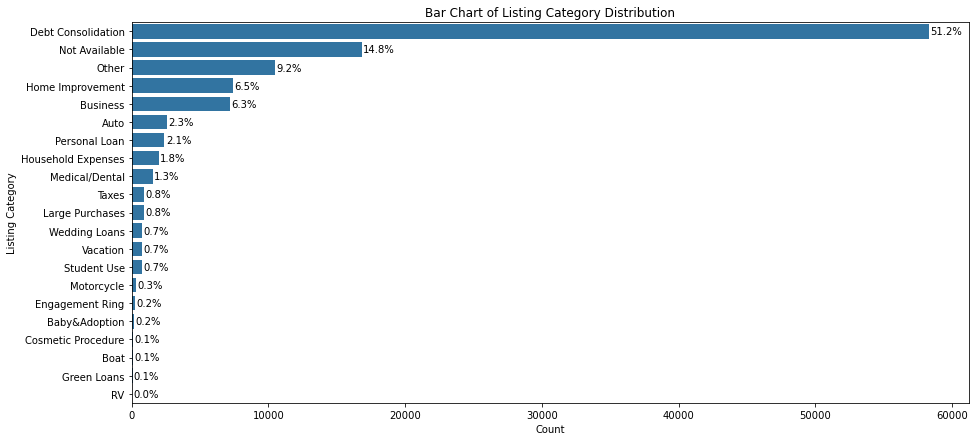

In [86]:
# Creating a bar chart for the Listing Category
plt.figure(figsize=(15, 7))
order = get_order('ListingCategory')
create_bar_chart(orientation='y', variable='ListingCategory', variable_name='Listing Category', order=order)

### Observation 13

It can be concluded that the most persons (51.2%) took out loans from Prosper for Debt Consolidation.

Great. I now have more insight on how the loan data is distributed.

<a id='unidist'></a>
### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Here are the distributions I observed:
1. The number of persons in the credit grades increases from  the `AA` grade and peaks at the `C` grade then decreases till the `HR` grade.
2. Most persons are on the 36-month term loan.
3. About half of the dataset are current borrowers.
4. The `BorrowerAPR` distribution increases steadily from 0.006530 (min) then peaks at the 0.15 - 0.225 range with other smaller peaks towards the right.
5. The frequency of the `BorrowerRate` distribution steadily increases from 0 (min) then starts declining after two peaks at around the 0.15 range then starts declining but it experiences another massive peak at the 0.31 area.
6. Most borrowers are from california.
7. Most borrowers classified their occupation as "Others" followed by "Professional"
8. About 80% of borrowers are employed, About 5% are self-employed, About 1% are Not employed and About 1% are retired.
9. Most borrowers have income ranges of USD25,000-49,999 and USD50,000-74,999 
10.  The`StatedMonthlyIncome` data has some outliers and most of the stated monthly income is from the range of 0 and 2000.
11. The `DebtToIncomeRatio` data has some outliers and most of the data are within the 0 and 1 range. The distribution progresses steadily from the right then gets its max peak at around 0.2 then declines steadily with smaller spikes and data gaps.
12. About half of the borrowers are homeowners and the other half aren't
13. About half of the borrowers took out a loan for Debt Consolidation.

I feel I didn't need to perform any transformations. I only needed to set some axes limits to remove some outliers.
<a id='uniunusual'></a>
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

#### Unusual Distrbutions
1. After doing <a href="https://www.prosper.com/invest/how-to-invest/prosper-ratings/?mod=article_inline">research</a> online to get the order of the credit grade, I notice the `NC` data isn't a credit
2. I also noticed the `CreditGrade` column had a lot of missing values so I further inspected the data in Excel and saw that the rest of the data is in another column `ProsperRating (Alpha)`
3. I noticed the `CreditGrade` datatype doesn't accurately decipit the data
4. The `Term` column was an integer and it would be better represented as a categorical (ordinal) data
5. In the `EmploymentStatus` Part-Time and Full-Time should also be classified as Employed since I don't have the data to seperate the Employed data into Part-Time and Full-Time, I'll be changing them to Employed.
6. Also, the `EmploymentStatus` already has filled nan values with `Not available`. 
7. The `IncomeRange` column is an ordinal data that should be a categorical (ordinal) data type.
8. The `IncomeRange` column could be more specific with the ranges instead of the `Not Employed` and `Not displayed` values
9. The data was represented with numbers as opposed to the required labels


#### Operation To Tidy, Adjust, or Change the Form of the Data. Why?
1. I had to drop the `NC` data in the dataset as it goes again the principles of data integrity.
2. I combined the two columns into one column and dropped the other because the former columns don't accurately portray the datset
3. I converted the `CreditGrade` column to a categorical order with the order [AA, A, B, C, D, E, HR] as this best decipits the data column.
4. I converted the int64 data type of the `Term` column to string then categorical as int64 datatype would be hard to handle since there won't be any mathematical operation on the column. 
5. I replaced all occurences of Full-time and Part-time to Employed.
6. To maintain consistency, I filled the remaining nan values.
7. I converted the `IncomeRange` column to a categorical data type as it is an ordinal data.
8. I created a new column `YearlyIncomeEstimate` from the `StatedMonthlyIncome` column and re-classified the data into the appropriate ranges in a new column `IncomeRangeAdj`
9. I created a dictionary with the former names as the keys and the new names as values. I then looped over the dictionary to change the column names to the required names as they would be that will be the best way to communicate the actual meanings of the data.

## Storing the Wrangled Dataset

Here, I'll be storing the clean dataset for use in the part II of the exploration excercise.

In [87]:
loan_df.to_csv('clean_prosper_loan_data.csv', index=False)

<a id='bi'></a>
## Bivariate Exploration

In this section, I'll investigate relationships between pairs of variables introduced in the univariate exploration section.

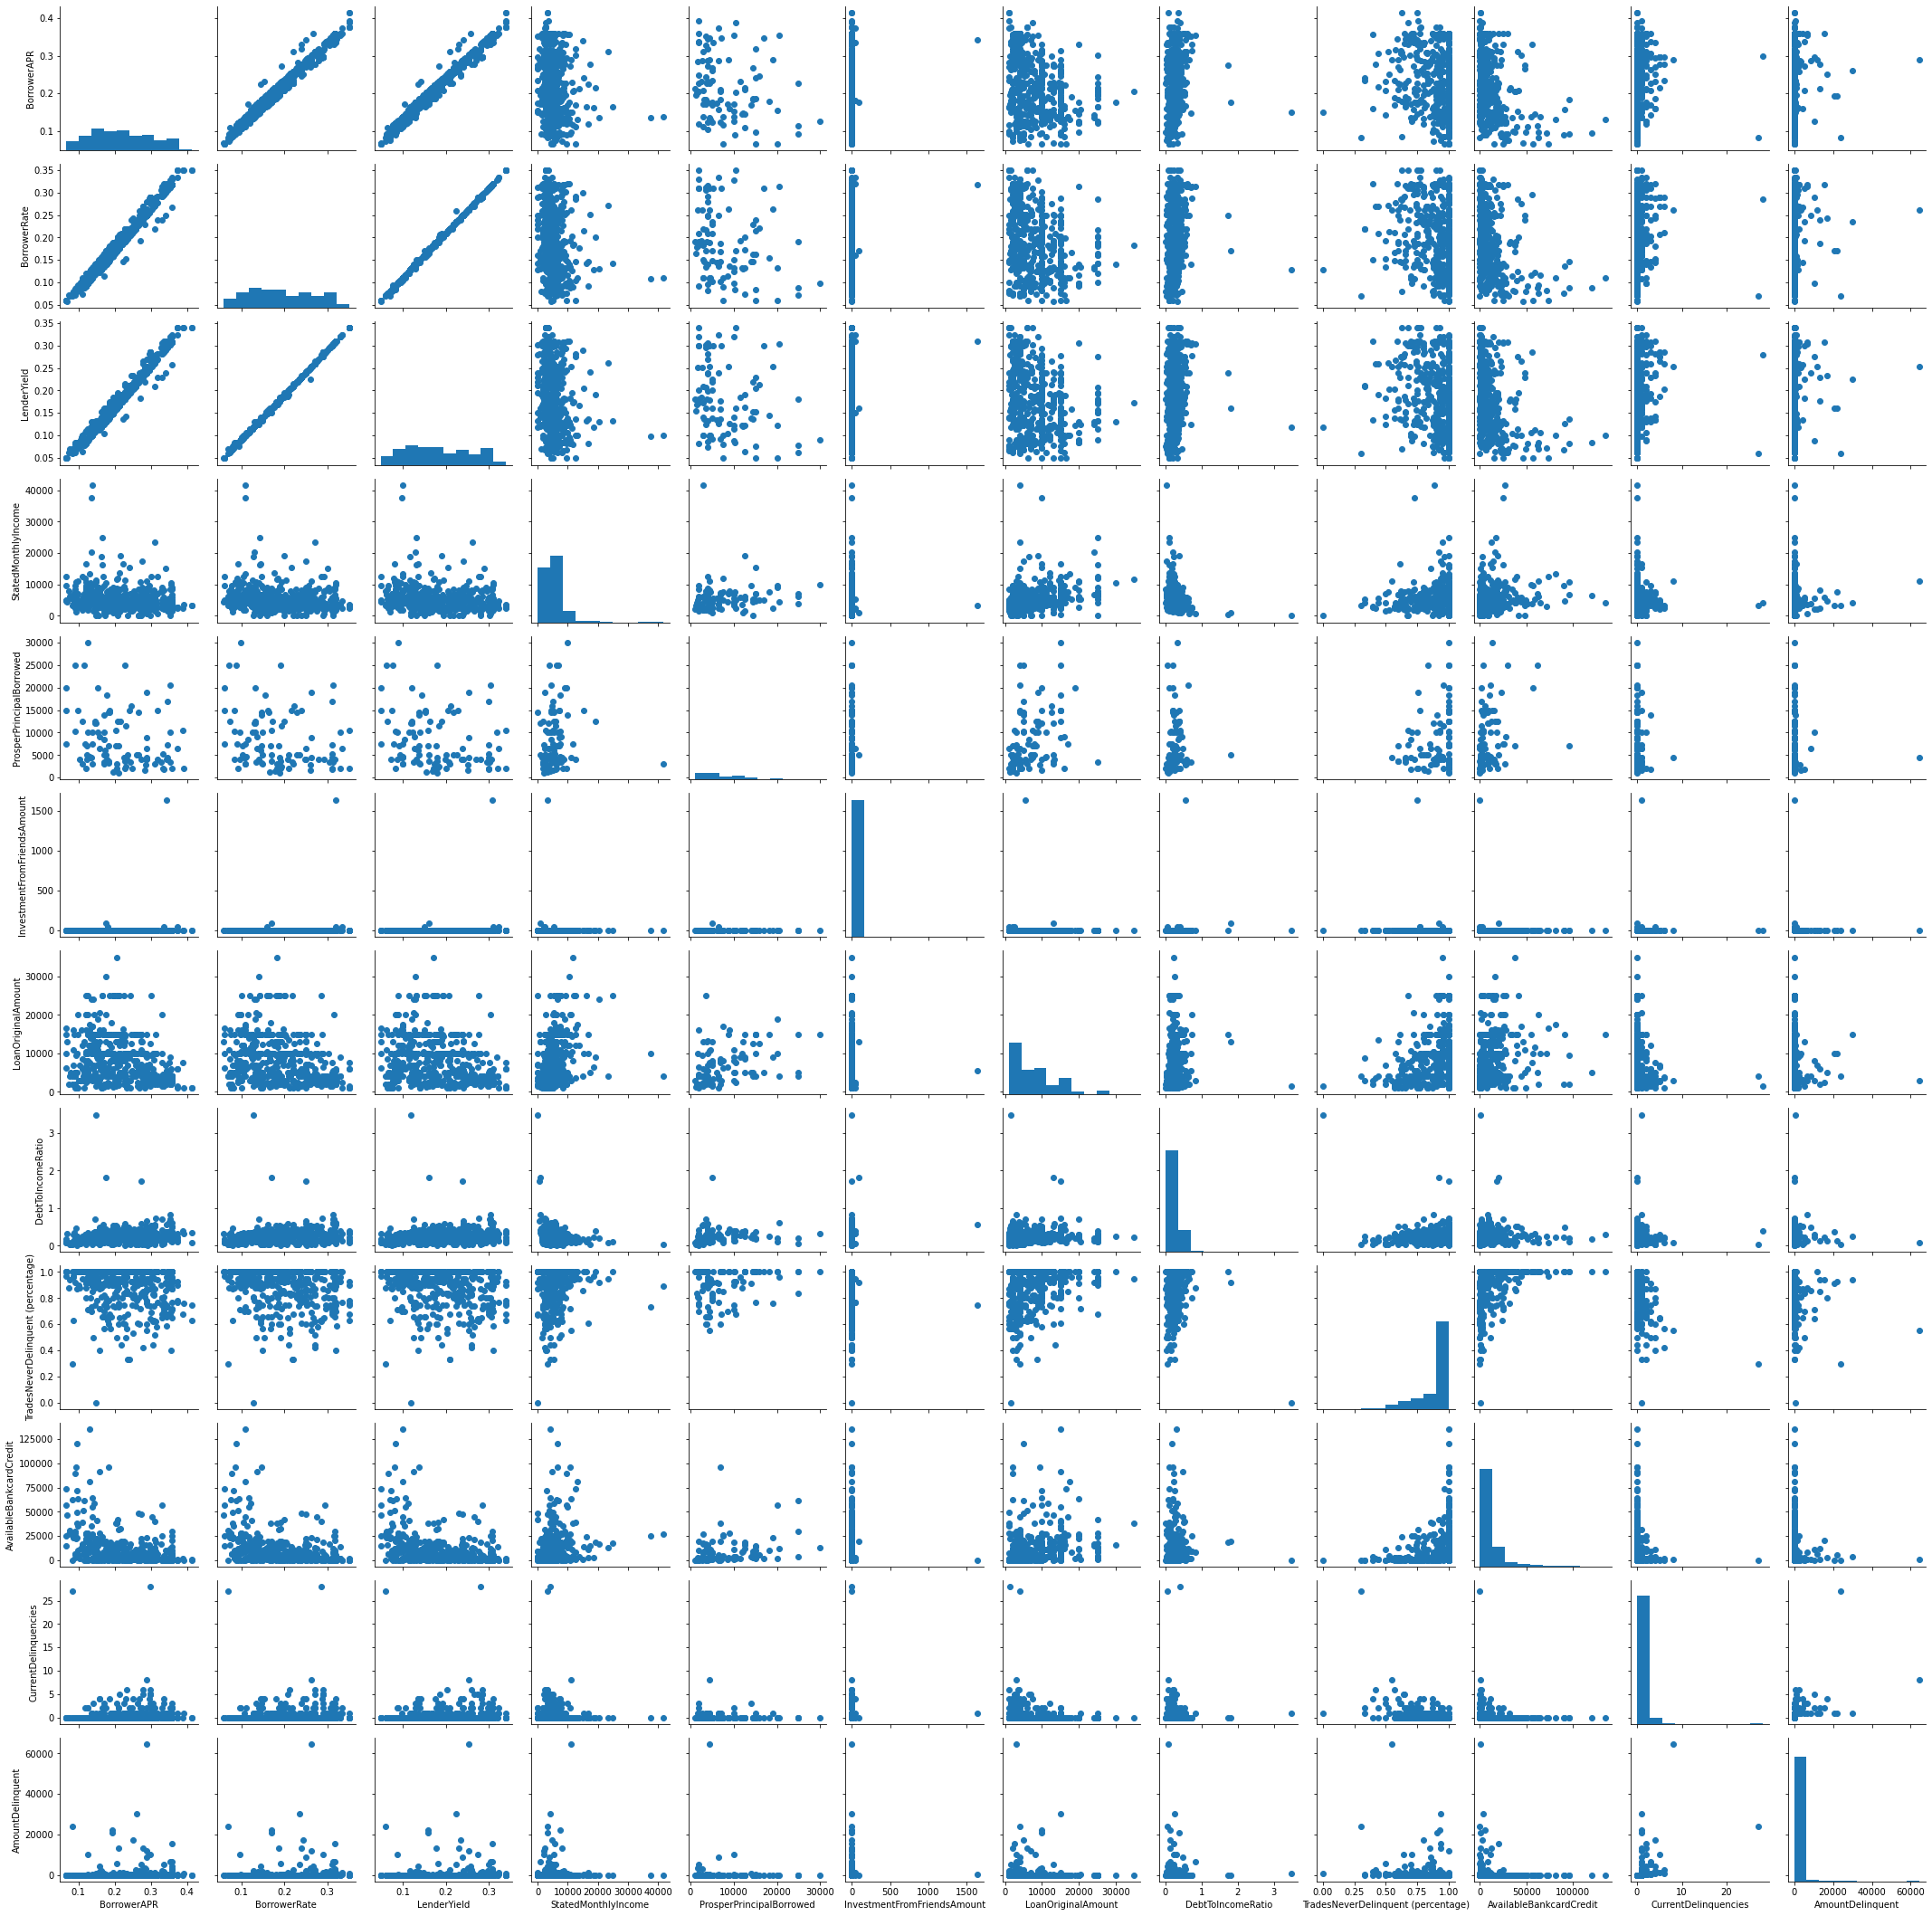

In [88]:
# Create a pair grid to briefly check out relationships between my features of interest
samples = np.random.choice(loan_df.shape[0], 500, replace = False)
loan_samp = loan_df.loc[samples,:]
var_list = ['BorrowerAPR', 'BorrowerRate', 'LenderYield', 'StatedMonthlyIncome', 'ProsperPrincipalBorrowed', 'InvestmentFromFriendsAmount', 'LoanOriginalAmount', 'DebtToIncomeRatio', 'TradesNeverDelinquent (percentage)', 'AvailableBankcardCredit', 'CurrentDelinquencies', 'AmountDelinquent']
g = sb.PairGrid(data = loan_samp, vars = var_list)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

                                    BorrowerAPR  BorrowerRate  LenderYield  \
BorrowerAPR                            1.000000      0.988420     0.987791   
BorrowerRate                           0.988420      1.000000     0.999597   
LenderYield                            0.987791      0.999597     1.000000   
StatedMonthlyIncome                   -0.156809     -0.174658    -0.172556   
ProsperPrincipalBorrowed              -0.236679     -0.243708    -0.243681   
InvestmentFromFriendsAmount            0.070237      0.077617     0.077679   
LoanOriginalAmount                    -0.303397     -0.301570    -0.301881   
DebtToIncomeRatio                      0.135374      0.132804     0.131189   
TradesNeverDelinquent (percentage)    -0.214625     -0.214797    -0.211825   
AvailableBankcardCredit               -0.376046     -0.362763    -0.359256   
CurrentDelinquencies                   0.086599      0.111483     0.113515   
AmountDelinquent                       0.069519      0.077817   

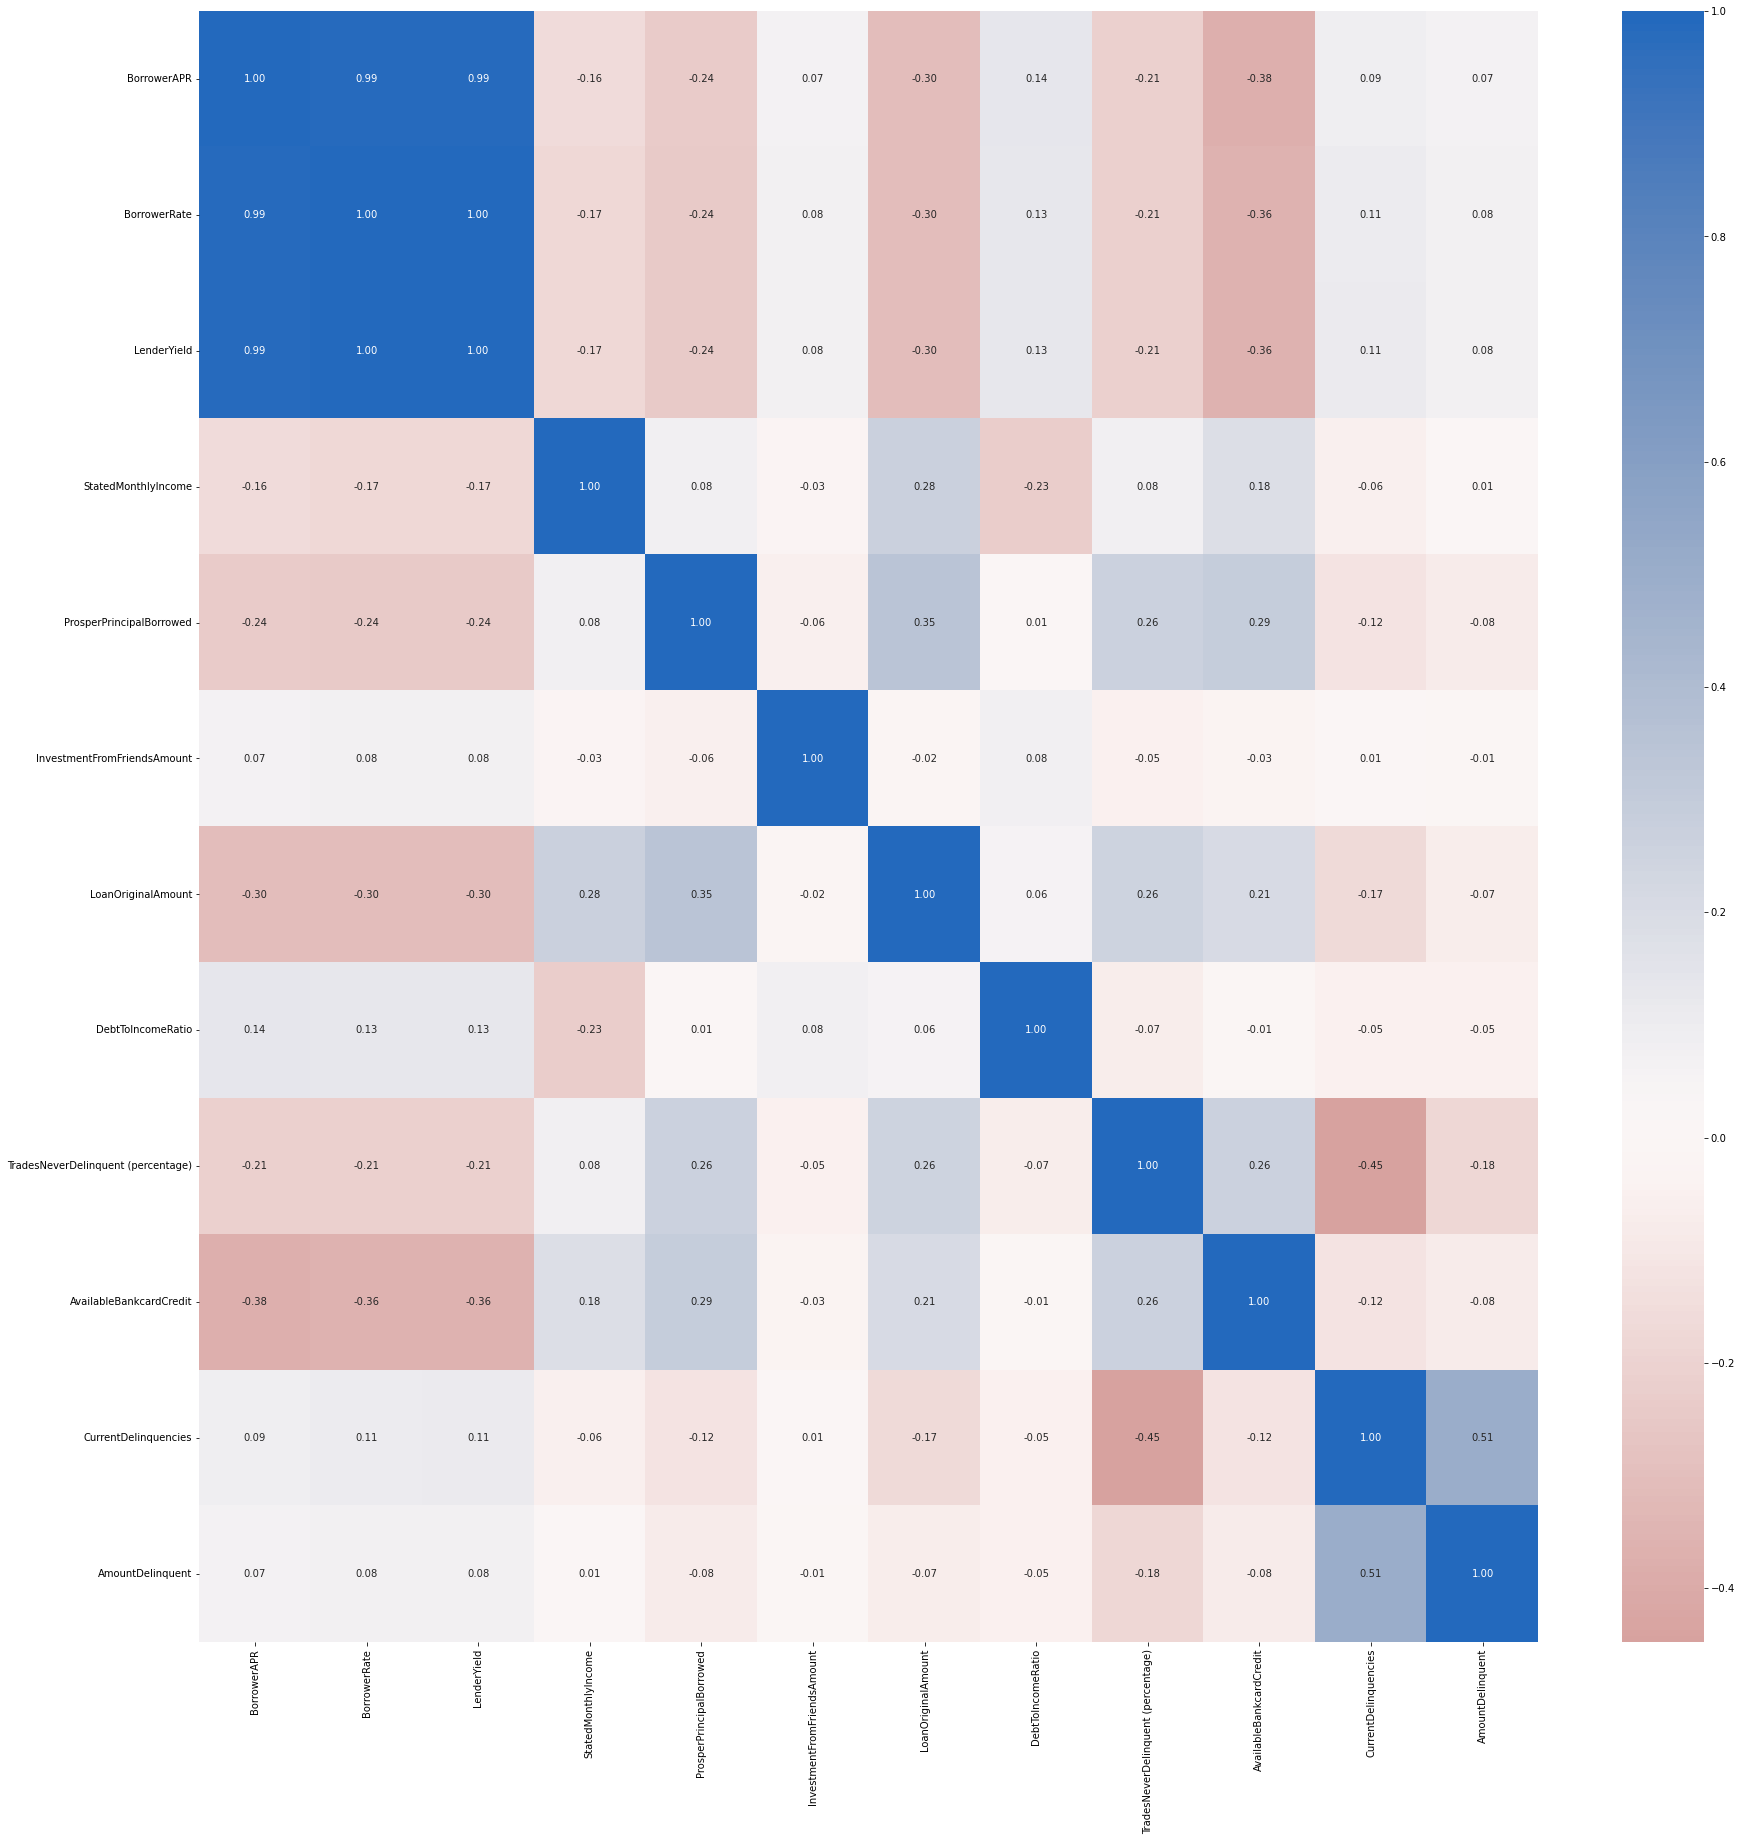

In [89]:
# Create a correlation heat map to briefly check out relationships between my features of interest
plt.figure(figsize=(30, 30))
print(loan_samp[var_list].corr())
sb.heatmap(loan_samp[var_list].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

From the charts above, it can be seen that the strongest correlations result from 3 variables (`BorrowerAPR`, `BorrowerRate`, `LenderYield`) <br>
It can be deduced that these 3 variables were most likely gotten from one another and depends on one another. So, I'll be using just one in my analysis.

I'll also create functions to reduce repition in this section.

In [90]:
# Creating a function to produce a scatter plot
def create_scatter(x, x_name, y, y_name, x_jitter=0, alpha=1):
    """To create a scatter plot with a few inputs"""
    sb.regplot(data = loan_df, x = x, y = y, truncate=False, x_jitter=x_jitter, scatter_kws={'alpha':alpha})
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title(f'Plot Showing the Relationship between {x_name} and {y_name}')

In [91]:
# Creating a function to easily produce a box plots
def create_box_plot(x, x_name, y, y_name, tilt_label=False):
    """Helps create a box plot with a few inputs"""
    #selecting the base color
    base_color = sb.color_palette()[0]
    # preparing the boxplot
    sb.boxplot(data=loan_df, x=x, y=y, color=base_color)
    # control flow to tilt the labels
    if tilt_label == True:
        plt.xticks(rotation=15)
    # Getting the required labels and title
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title(f'Box Plot Showing the Relationship between {x_name} and {y_name}')

<a id="qb1"></a>
### Question 1

What affects the borrower's APR?

From the charts above, the following seem to affect the borrower's APR but I'll be digging into them more closely to answer this question:
1. ProsperPrincipalBorrowed
2. LoanOriginalAmount
3. TradesNeverDeliquent
4. AvailableBankcardCredit

Other variables that might affect the borrower's APR are:
1. CreditGrade
2. EmploymentStatus
3. IncomeRangeAdj
4. IsBorrowerHomeowner

Let's check out how each of these variables are related to the borower's APR

First, let's check out the relatonship between borrower APR and Prosper Principal Borrowed.

<a id='qb1.1'></a>
### Question 1.1

What is the relationship between the Prosper Principal Borrowed and Borrower APR?

### Visualization 1.1

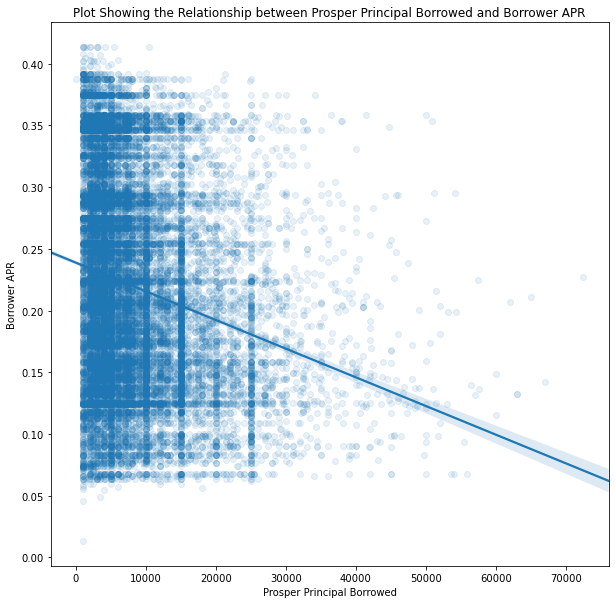

In [92]:
# createing a scatter plot to show the relationship between prosper principal borrowed and borrower's APR
plt.figure(figsize=(10, 10))
create_scatter(x='ProsperPrincipalBorrowed', x_name='Prosper Principal Borrowed', y='BorrowerAPR', y_name='Borrower APR', alpha=0.1)

### Observation 1.1

The above visualization shows that the borrower's APR has a negative relationship with the Prosper Principal Borrowed

Now, let's see the replationship between the loan original amount and borrower APR.

<a id='qb1.2'></a>
### Question 1.2

What is the relationship between Loan Original Amount and borrower APR?

### Visualization 1.2

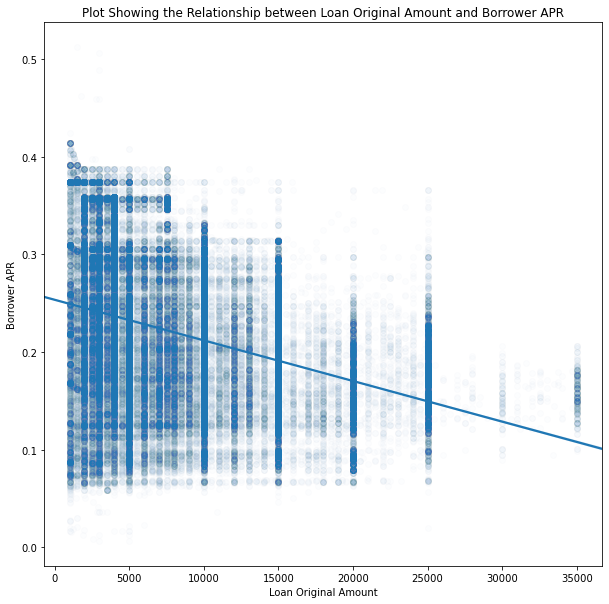

In [93]:
# To create a scatter plot to show the relationship between the loan original amount and borrower APR
plt.figure(figsize=(10, 10))
create_scatter(x='LoanOriginalAmount', x_name='Loan Original Amount', y='BorrowerAPR', y_name='Borrower APR', alpha=0.01)

### Observation 1.2

The visualization above shows that the borrower APR negatively correlates with the Loan Original Amount

Next, I'll be exploring the relationship between the `BorrowerAPR` and `TradesNeverDeliquent`

<a id='qb1.3'></a>
### Question 1.3

What is the relationship between Trades Never Deliquent and borrower APR?

### Visualization 1.3

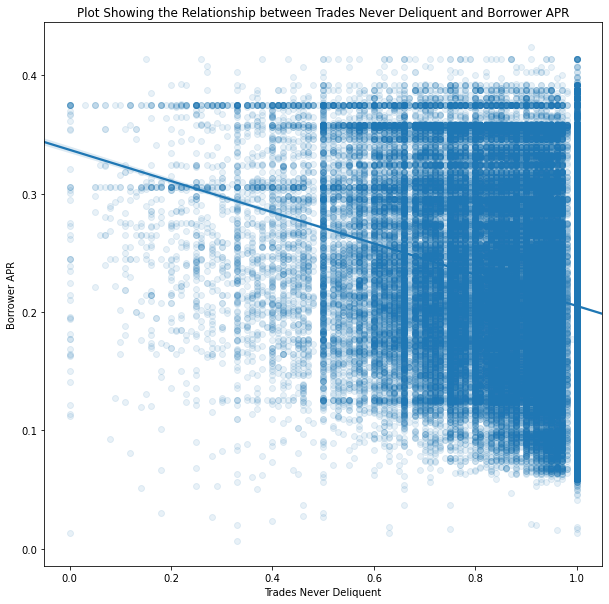

In [94]:
# To create a scatter plot to show the relationship between the Trades Never Deliquent and borrower APR
plt.figure(figsize=(10, 10))
create_scatter(x='TradesNeverDelinquent (percentage)', x_name='Trades Never Deliquent', y='BorrowerAPR', y_name='Borrower APR', alpha=0.1)

### Observation 1.3

From the above visualization, it can be seen that there's generally a negative correlation between the Trades Never Deliquent and the Borrower APR variables.

Now, I'll explore how the `BorrowerAPR` is related to `AvailableBankcardCredit`

<a id='qb1.4'></a>
### Question 1.4

What is the relationship between Available Bankcard Credit and borrower APR?

### Visualization 1.4

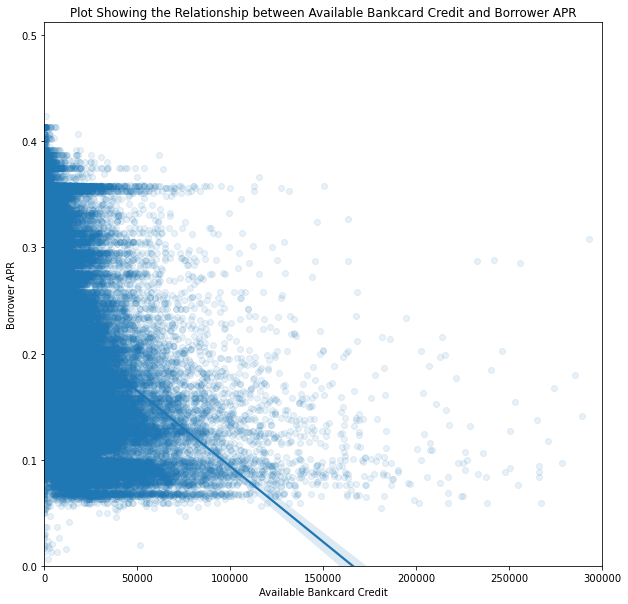

In [95]:
# To create a scatter plot to show the relationship between the Available Bankcard Credit and borrower APR
plt.figure(figsize=(10, 10))
create_scatter(x='AvailableBankcardCredit', x_name='Available Bankcard Credit', y='BorrowerAPR', y_name='Borrower APR', alpha=0.1)
# To make the visual show a better relationship
plt.ylim(0, loan_df.BorrowerAPR.max())
plt.xlim(0, 300000);

### Observation 1.4

This visualization shows a negative correlation between the Available Bankcard Credit and Borrower APR.

Now, let's check out the relationship between the `BorrowerAPR` and some categorical and nominal data

I'll start with the `CreditCredit`

### Question 1.5

How does the Credit Grade affect the Borrower APR?

### Visualization 1.5

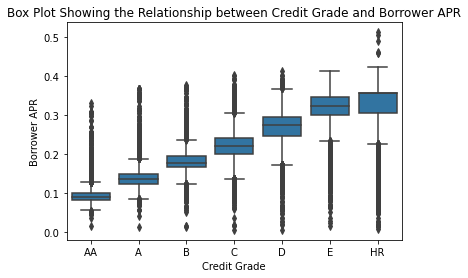

In [96]:
# Creating a box plot to show the relationship between the Borrower APR and the Credit Grades
create_box_plot(x='CreditGrade', x_name='Credit Grade', y='BorrowerAPR', y_name='Borrower APR')

### Observation 1.5

This visualization shows that generally, the higher the credit grade level, the lower the Borrower APR.

Now, let's check out the relationship between the `BorrowerAPR` and `EmploymentStatus`

### Question 1.6

How does Employment Status affect the Borrower APR?

### Visualization 1.6

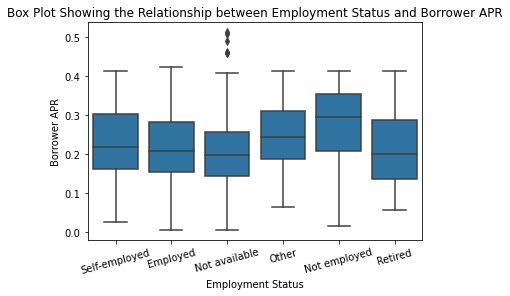

In [97]:
# Creating a box plot to show the relationship between the Borrower APR and the Employment Status
create_box_plot(x='EmploymentStatus', x_name='Employment Status', y='BorrowerAPR', y_name='Borrower APR', tilt_label=True)

### Observation 1.6

This shows that compared to Not employed and Other Employment Statuses, persons that are employed, self_employed, and retired, have lower Borrower APR

Next, I'll explore the relationship between the `IncomeRangeAdj` and `BorrowerAPR`

### Question 1.7

How does the Income Range affect the Borrower APR?

### Visualization 1.7

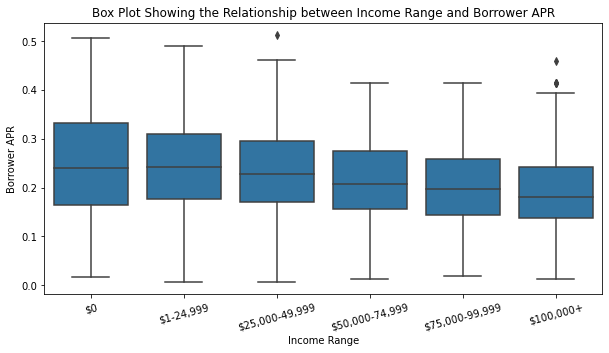

In [98]:
# Creating a box plot to show the relationship between the Borrower APR and the Income Range
plt.figure(figsize=(10, 5))
create_box_plot(x='IncomeRangeAdj', x_name='Income Range', y='BorrowerAPR', y_name='Borrower APR', tilt_label=True)

### Observation 1.7

This visualization shows that starting from the `$1-24,999` range, the Borrower APR generally decreases with increasing income range.<br>
The `$0` range doesn't follow the trend probably because borrowers that are meant to be in other income ranges didn't fill in their `StatedMonthlyIncome` correctly.

Next question will be answering the question "Does being a homeowner affect Borrower APR"

### Question 1.8

If the borrower is a homeowner, will it affect the Borrower APR?

### Visualization 1.8

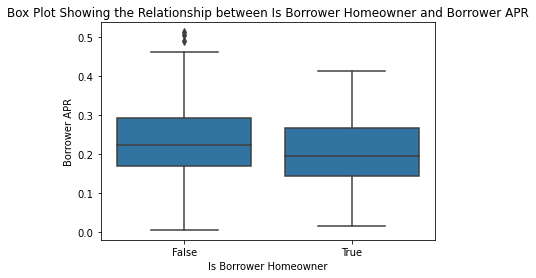

In [99]:
# Creating a box plot to show the relationship between the Borrower APR and the IsBorrowerHomeowner
create_box_plot(x='IsBorrowerHomeowner', x_name='Is Borrower Homeowner', y='BorrowerAPR', y_name='Borrower APR')

### Observation 1.8

The Borrower APR is generally lower for persons who are homeowners.

Now, I'll explore the relationship between the `BorrowerAPR` and `Term`

### Question 1.9

How does the loan term affect the `BorrowerAPR`

### Visualization 1.9

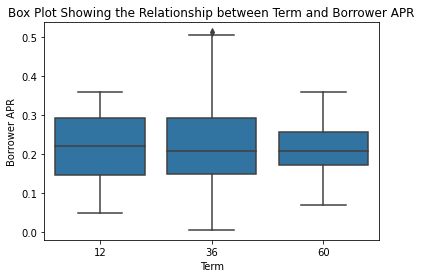

In [100]:
# Creating a box plot to show the relationship between the Borrower APR and the loan Term
create_box_plot(x='Term', x_name='Term', y='BorrowerAPR', y_name='Borrower APR')

### Conclusion 1.9

From the visualization above, it can be seen that the Borrower APR for the 36 month term is slightly lower than the Borrower APR of the other 2 terms.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

1. The `BorrowerAPR`, `BorrowerRate`, `LenderYield` have almost perfect positive correlations.
2. The borrower's APR has a negative relationship with the Prosper Principal Borrowed
3. The borrower APR negatively correlates with the Loan Original Amount
4. Generally, the higher the credit grade level, the lower the Borrower APR.
5. Compared to Not employed and Other Employment Statuses, persons that are employed, self_employed, and retired, have lower Borrower APR
6. Starting from the `USD1-24,999 range`, the Borrower APR generally decreases with  ncreasing income range.
7. The low Borrower APR of the `USD0` range might be due to that only 0.5% of the total data is in that range.
8. The `Not Employed` range has the highest Borrower APR average in the data set.
9. The Borrower APR is generally lower for persons who are homeowners.
10. the Borrower APR for the 36 month term is slightly lower than the Borrower APR of the other 2 term

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Yes, from the plots, I observed that:
1. There's generally a negative correlation between the Trades Never Deliquent and the Borrower APR variables.
2. There's a negative correlation between the Available Bankcard Credit and Borrower APR.

<a id="multi"></a>
## Multivariate Exploration

In this section of the analysis, I'll be exploring relationships between 3 or more variables.

### Question 1

How does the `CreditGrade` and the `LoanOriginalAmount` affect `BorrowerAPR`?

### Visualization 1

In [101]:
corr_list = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
for i in corr_list:
    print(f'Correlation Table for Credit Grade {i}')
    new_df = loan_df[loan_df['CreditGrade'] == i]
    print(new_df[['BorrowerAPR', 'LoanOriginalAmount']].corr())
    print('\n')

Correlation Table for Credit Grade AA
                    BorrowerAPR  LoanOriginalAmount
BorrowerAPR            1.000000            0.363508
LoanOriginalAmount     0.363508            1.000000


Correlation Table for Credit Grade A
                    BorrowerAPR  LoanOriginalAmount
BorrowerAPR            1.000000            0.262263
LoanOriginalAmount     0.262263            1.000000


Correlation Table for Credit Grade B
                    BorrowerAPR  LoanOriginalAmount
BorrowerAPR            1.000000            0.095572
LoanOriginalAmount     0.095572            1.000000


Correlation Table for Credit Grade C
                    BorrowerAPR  LoanOriginalAmount
BorrowerAPR            1.000000            0.087224
LoanOriginalAmount     0.087224            1.000000


Correlation Table for Credit Grade D
                    BorrowerAPR  LoanOriginalAmount
BorrowerAPR            1.000000            0.072768
LoanOriginalAmount     0.072768            1.000000


Correlation Table for Cr

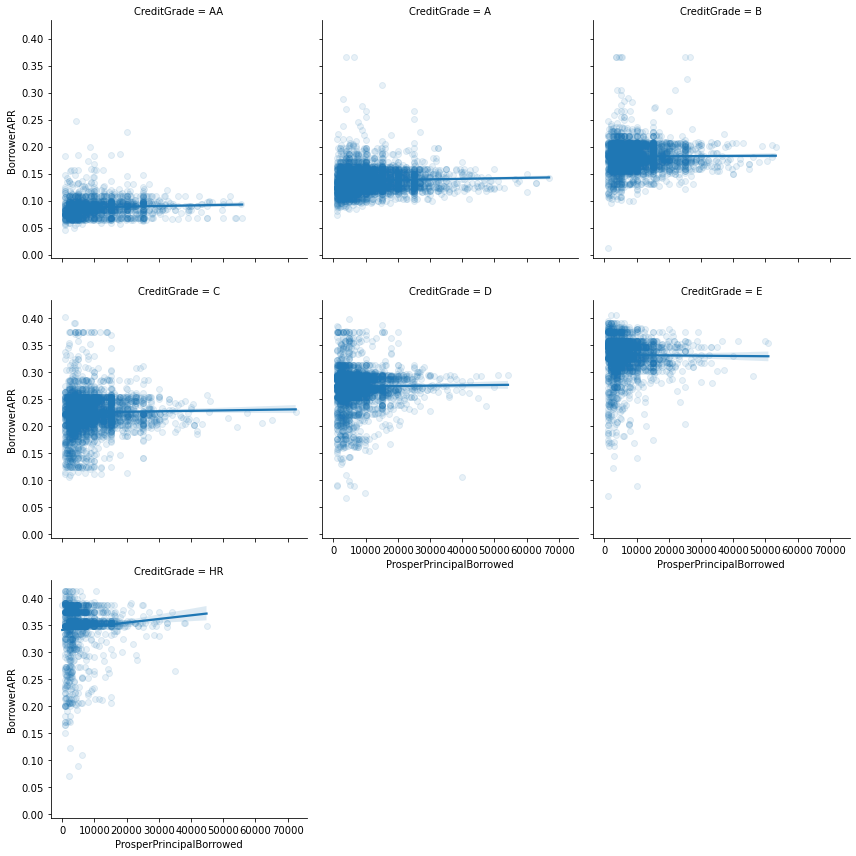

In [102]:
g = sb.FacetGrid(data = loan_df, col = 'CreditGrade', height = 4, col_wrap=3, margin_titles = True)
g.map(sb.regplot, 'ProsperPrincipalBorrowed', 'BorrowerAPR', scatter_kws={'alpha':0.1});

### Observation 1

From the table of correlation and visualization above, it shows that:
1.  There is a positive correlation between the Borrower APR and Original Loan Amount when the data is grouped by credit grade.
2. The positive correlation reduces from grade AA to grade E but spikes at grade HR

Now, check out the how the relationship between borrower APR and two categorical variables.

### Question 2

How do the `EmploymentStatus` and `Term` affect `BorrowerAPR` 

### Visualization 2

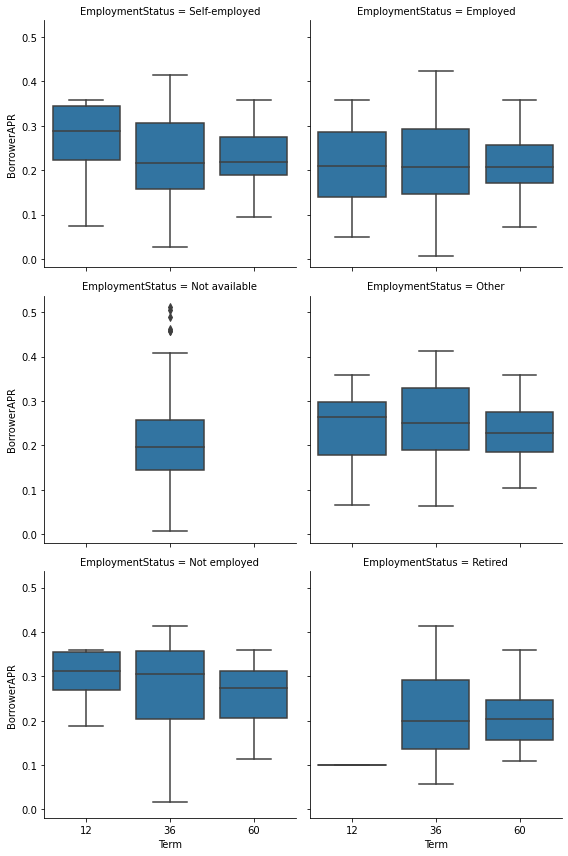

In [103]:
g = sb.FacetGrid(data = loan_df, col = 'EmploymentStatus', height = 4, col_wrap=2)
g.map(sb.boxplot, 'Term', 'BorrowerAPR', order=['12', '36', '60'])

### Observation 2

From the visualizations, it can be seen that:
1. The 36-month term generally has lower Borrower APR for the Employed, Retired, and Self-employed Employment Statuses
2. The Not employed Employment Status has lower APR for the 60-month loan term probably to offer more time to pay up since that category doesn't have a regular source of income.

The last mulitvariate visual will be showing how the credit grade and income range both affect the borrower APR.

### Question 3

How does the `CreditGrade` and `IncomeRangeAdj` affect the `BorrowerAPR`?

### Visualization 3

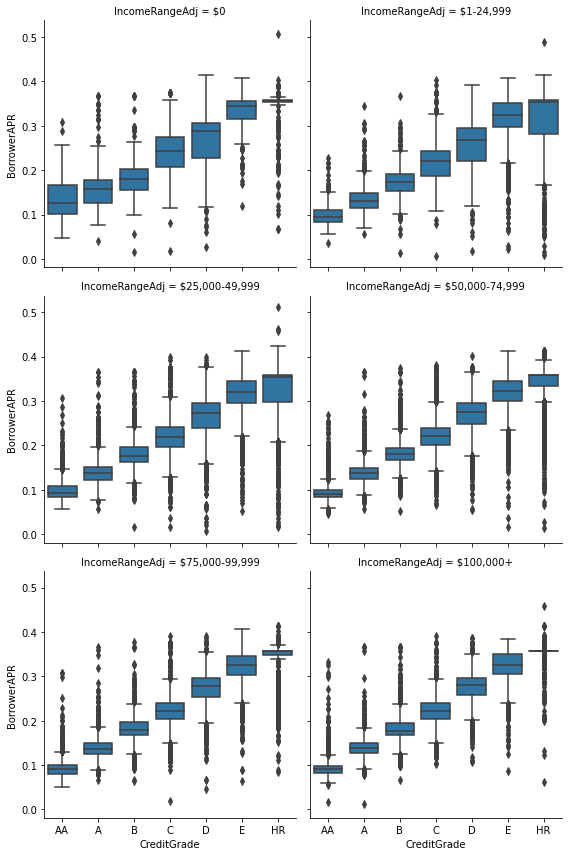

In [104]:
g = sb.FacetGrid(data = loan_df, col = 'IncomeRangeAdj', height = 4, col_wrap=2)
g.map(sb.boxplot, 'CreditGrade', 'BorrowerAPR', order=['AA', 'A', 'B', 'C', 'D', 'E', 'HR'])

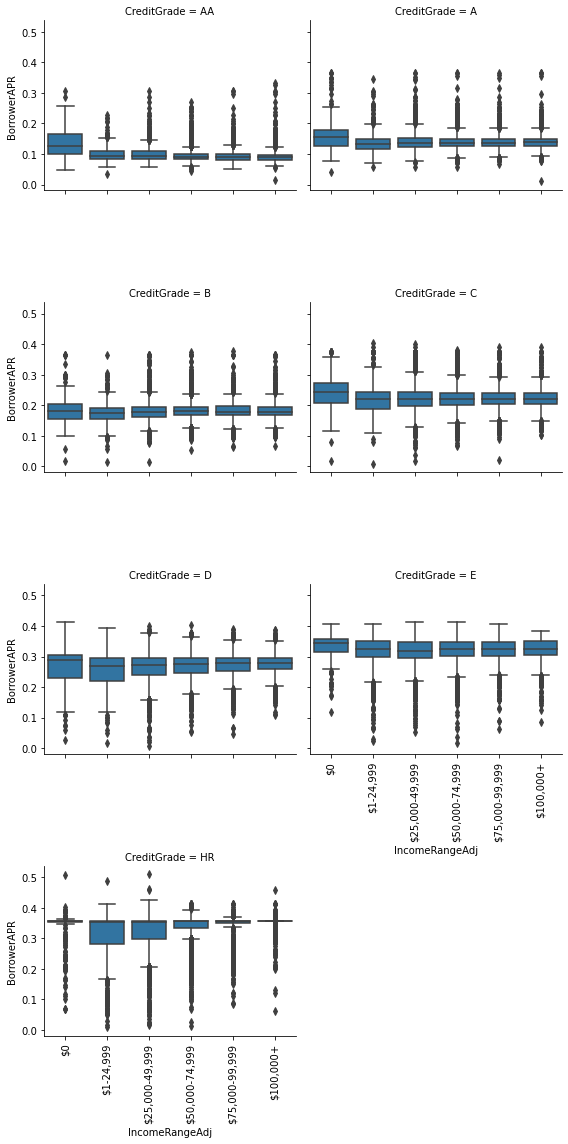

In [105]:
# plotting another variant
g = sb.FacetGrid(data = loan_df, col = 'CreditGrade', height = 4, col_wrap=2)
g1 = g.map(sb.boxplot, 'IncomeRangeAdj', 'BorrowerAPR', order=['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'])
plt.xticks(rotation=90);
# Rotate the x-axes labels
for axes in g.axes.flat:
    new_labels = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()

### Conclusion 3

These visualizations reaffirms the observations made earlier in the Bivariate section that persons with higher credit grade and in the upper income range, will generally have lower borrower APR.<br>
It can also be seen that the credit grade is a more prominent factor in determining the borrower APR as borrowers with higher credit grades will always get lower borrower APR regardless of their income range.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
I was able to group a correlation chart between Borrower APR and Original Loan Amount and from the plot, I saw where most of the datasets were populated and was able to make some observations as listed above.<br>
The multivariate visualizations reaffirms the observations made earlier in the Bivariate section that persons with higher credit grade and in the upper income range, will generally have lower borrower APR.


### Were there any interesting or surprising interactions between features?

1. There is a positive correlation between the Borrower APR and Original Loan Amount when the data is grouped by credit grade.
2. The positive correlation reduces from grade AA to grade E but spikes at grade HR
3. The 36-month term generally has lower Borrower APR for the Employed, Retired, and Self-employed Employment Statuses
4. The Not employed Employment Status has lower APR for the 60-month loan term probably to offer more time to pay up since that category doesn't have a regular source of income.
5. It can also be seen that the credit grade is a more prominent factor in determining the borrower APR as borrowers with higher credit grades will always get lower borrower APR regardless of their income range.

<a id='conclusions'></a>
## Conclusions
After the exploration, I was able to get insights on distributions in the Univariate plots, insights on some basic relationships from the Bivariate plots, and more insights on some more complex relationships in the Multivariate plots.<br>
From the exploration, I can conclude that the Credit Grade is a major factor that affects the borrower APR and that other factors only play supporting roles in the determination of the Borrower APR.